# Tobigs Week4 Ensemble assignment

[Ï∫êÍ∏Ä Ïª¥ÌéòÌã∞ÏÖò](https://www.kaggle.com/c/tobigs1415-kaggle-ensemble-competition/data?select=ggstore_test.csv)

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ìå®ÌÇ§ÏßÄ ÏûÑÌè¨Ìä∏

colabÌôòÍ≤ΩÏóêÏÑú ÏûëÏóÖÌñàÍ∏∞ ÎïåÎ¨∏Ïóê google driveÏóêÏÑú ÌååÏùºÏùÑ Î∂àÎü¨ÏôîÏäµÎãàÎã§.

In [1]:
!unzip /content/drive/MyDrive/Datasets/tobigs1415-kaggle-ensemble-competition.zip -d /content/assignment_data

Archive:  /content/drive/MyDrive/Datasets/tobigs1415-kaggle-ensemble-competition.zip
  inflating: /content/assignment_data/ggstore_test.csv  
  inflating: /content/assignment_data/ggstore_train.csv  


In [2]:
! pip install xgboost
! pip install vecstack
! pip install lightgbm

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19880 sha256=6290926cd0acfe0c0adf531c57eaa53baebe532aaa216483ec88734bec8a83d4
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [3]:
# Ìå®ÌÇ§ÏßÄ import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
all_train_data = pd.read_csv("/content/assignment_data/ggstore_train.csv")
all_test_data = pd.read_csv("/content/assignment_data/ggstore_test.csv")

In [5]:
all_train_data.head() # Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

App  ... Id
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  0
1                                Coloring book moana  ...  1
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...  2
3                              Sketch - Draw & Paint  ...  3
4              Pixel Draw - Number Art Coloring Book  ...  4

[5 rows x 12 columns]

In [6]:
print(f"Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïàò : {len(all_train_data)}")
print(f"Ï†ÑÏ≤¥ ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ Ïàò : {len(all_test_data)}")
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Columns Ïàò : {all_train_data.shape[1]}")
print(f"ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïùò Columns Ïàò : {all_test_data.shape[1]}")

Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïàò : 5616
Ï†ÑÏ≤¥ ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ Ïàò : 1404
ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Columns Ïàò : 12
ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïùò Columns Ïàò : 11


- ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Ï¥ù ÏàòÎäî 5616Í∞úÏù¥Î©∞, ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎäî 1404Î°ú, ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ : ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ = 4 : 1 Ïù∏ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.
- ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïùò ColumnÏù¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î≥¥Îã§ Ìïú Í∞ú Ï†ÅÏùÄ Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§. ÌôïÏù∏Ïù¥ ÌïÑÏöîÌï† Í≤É Í∞ôÎã§.


# Îç∞Ïù¥ÌÑ∞ EDA Î∞è Ï†ÑÏ≤òÎ¶¨

## Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú ÌôïÏù∏

ÏïûÏÑú ÌôïÏù∏ÌñàÏùÑÎïå test_dataÏùò columnsÏàòÍ∞Ä Ìïú Í∞ú Ï†ÅÏùÄÍ≤ÉÏùÑ ÌôïÏù∏Ìï¥ÏÑú Ï≤¥ÌÅ¨Ìï¥ Î≥¥ÏïòÎã§.

In [6]:
all_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [7]:
all_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


ÌôïÏù∏ Í≤∞Í≥º ÏòàÏ∏°Ìï¥ÏïºÌïòÎäî Î≥ÄÏàòÏù∏ Rating Ïù¥ ÏÇ¨ÎùºÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

`all_test_data` Îäî Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞ÄÏãú ÌèâÍ∞ÄÏùò ÏßÄÌëúÍ∞Ä ÎêòÎäî Îç∞Ïù¥ÌÑ∞Î°ú ÏÉùÍ∞ÅÎêòÎ©∞, ÏµúÏ¢Ö Ï†úÏ∂úÏö© Îç∞Ïù¥ÌÑ∞Î°ú ÏÉùÍ∞ÅÎêúÎã§.

Îî∞ÎùºÏÑú `all_test_data` Îäî ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≤†Îã§.

In [ ]:
all_train_data.describe()

Rating       Reviews  ...        Price           Id
count  5616.000000  5.616000e+03  ...  5616.000000  5616.000000
mean      4.177386  1.686437e+05  ...     1.409918  2807.500000
std       0.543153  1.126012e+06  ...    20.341193  1621.343887
min       1.000000  1.000000e+00  ...     0.000000     0.000000
25%       4.000000  1.140000e+02  ...     0.000000  1403.750000
50%       4.300000  2.158000e+03  ...     0.000000  2807.500000
75%       4.500000  3.292125e+04  ...     0.000000  4211.250000
max       5.000000  4.489172e+07  ...   400.000000  5615.000000

[8 rows x 7 columns]

`describe()` Î•º ÏÇ¨Ïö©Ìï¥ Î≥∏ Í≤∞Í≥º ÌäπÎ≥ÑÌïú Ïù¥ÏÉÅÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÏïòÎã§.

In [ ]:
for col in all_train_data.columns:
  print(f"{col}Ïùò Unique Í∞úÏàò : {len(all_train_data[col].unique())} \n\n ")

AppÏùò Unique Í∞úÏàò : 5616 

 
CategoryÏùò Unique Í∞úÏàò : 33 

 
RatingÏùò Unique Í∞úÏàò : 38 

 
ReviewsÏùò Unique Í∞úÏàò : 3697 

 
SizeÏùò Unique Í∞úÏàò : 352 

 
InstallsÏùò Unique Í∞úÏàò : 19 

 
TypeÏùò Unique Í∞úÏàò : 2 

 
PriceÏùò Unique Í∞úÏàò : 61 

 
Content RatingÏùò Unique Í∞úÏàò : 6 

 
GenresÏùò Unique Í∞úÏàò : 106 

 
Last UpdatedÏùò Unique Í∞úÏàò : 1132 

 
IdÏùò Unique Í∞úÏàò : 5616 

 


Ï†ÑÏ≤¥ Column Î≥ÑÎ°ú Unique valueÏùò ÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥ÏïòÎã§.

Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïÑÎãå, ÏàòÏπòÌòï Î≥ÄÏàòÏùò Í∞úÏàòÎäî Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÏù∏ 5616Í∞úÏóê Ìù°ÏÇ¨ÌïòÍ≤å ÎÇòÏò¨ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÏóàÎã§.

ÎààÏóê ÎùÑÎäî Ï†êÏùÑ Ï†ïÎ¶¨ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏïòÎã§.
- `Installs` Í∞Ä 19Í∞úÎ∞ñÏóê ÎêòÏßÄ ÏïäÏïòÎã§. Îã§Ïö¥ ÏàòÎ•º ÌÅ∞ ÏàòÏóêÏÑú Î∞òÏò¨Î¶ºÌïòÍ∏∞ ÎïåÎ¨∏Ïùº Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÎêúÎã§. Ïù¥Îäî Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ≥¥Îã§Îäî Î≤îÏ£ºÌòïÏóê Í∞ÄÍπåÏö¥ ÏàòÏπòÎùºÍ≥† ÏÉùÍ∞ÅÎêúÎã§.
- `Price`Í∞Ä 61Í∞úÏ†ïÎèÑÎ°ú Í∞úÏàòÍ∞Ä ÎÇÆÍ≤å ÎÇòÏôîÎã§.
- `Genre`Ïùò Í∞úÏàòÎäî ÏÉÅÎãπÌûà ÎßéÏù¥ ÎÇòÏôîÎã§. ÎòêÌïú `Category` Î≥ÄÏàòÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏùòÏã¨ÎêúÎã§.
- `Last Updated` Ïùò ÎÇ†Ïßú Î∂ÑÌè¨Î•º ÏïåÏïÑÏïº Ïïå ÎìØ ÌïòÎã§.
- `Id` Î≥ÄÏàòÎäî Îã®ÏàúÌûà idÍ∞íÏúºÎ°ú, Ï∞®ÌõÑ Ï†úÍ±∞Í∞Ä ÌïÑÏöîÌïòÎã§.

ÏúÑÏóêÏÑú ÎÇòÏò® Î≥ÄÏàòÎì§ÏùÑ ÏúÑÏ£ºÎ°ú valueÍ∞íÎèÑ ÌôïÏù∏Ìï¥ Î≥¥ÏïòÎã§.

In [ ]:
chk_cols = ['Installs','Price', 'Type', 'Content Rating', 'Category', 'Genres', 'Last Updated']
for col in chk_cols:
  print(f"{col}Ïùò Unique Í∞úÏàò : {len(all_train_data[col].unique())} \n values : {all_train_data[col].unique()} \n\n ")

InstallsÏùò Unique Í∞úÏàò : 19 
 values : [1.e+04 5.e+05 5.e+06 5.e+07 1.e+05 5.e+04 1.e+06 1.e+07 5.e+03 1.e+08
 1.e+03 5.e+08 1.e+02 5.e+02 1.e+01 1.e+09 5.e+00 5.e+01 1.e+00] 

 
PriceÏùò Unique Í∞úÏàò : 61 
 values : [  0.     4.99   6.99   7.99   3.99   5.99   2.99   1.99   9.99   0.99
   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99  29.99  12.99
   3.49  10.99   7.49   1.5   19.99  15.99  33.99  39.99   2.49   4.49
   1.7    1.49   3.88 399.99  17.99 400.     3.02   1.76   4.84   4.77
   1.61   1.59   6.49   1.29 299.99 379.99  37.99  18.99 389.99   8.49
   1.75  14.     2.     3.08   2.59  19.4   15.46   8.99   3.04  13.99
   4.29] 

 
TypeÏùò Unique Í∞úÏàò : 2 
 values : [0 1] 

 
Content RatingÏùò Unique Í∞úÏàò : 6 
 values : ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'] 

 
CategoryÏùò Unique Í∞úÏàò : 33 
 values : ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATIO

ÌôïÏù∏ Í≤∞Í≥ºÎäî Îã§ÏùåÍ≥º Í∞ôÏïòÎã§.
- `Installs` Îäî 1Î∂ÄÌÑ∞ 1.e+09 ÍπåÏßÄ Î∞òÏò¨Î¶ºÏãúÏºúÎÜìÏùÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÏÉùÍ∞ÅÎèºÏïº Ìï† Í≤É Í∞ôÎã§.
- `Price` Îäî Í∞Å Ïï±Î≥ÑÎ°ú Í∞ÄÍ≤©Ïù¥ ÎπÑÏä∑ÌïòÍ∏∞ ÎïåÎ¨∏ÏúºÎ°ú Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú Ï∑®Í∏âÌïòÍ∏∞Îäî Ïñ¥Î†§Ïö∏ Í≤É Í∞ôÎã§.
- `Type` Îäî 0Í≥º 1 Îëê Í∞úÏùò Í∞íÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï†Ä ÏûàÎã§.
- `Content Rating` ÏùÄ Ïï±Ïùò Ïó∞Î†πÏ†úÌïúÏù∏ Î≤îÏ£ºÌòï Î≥ÄÏàòÏù¥Îã§.
- `Genre`Îäî `Category` Ïùò ÌïòÏúÑ Î∂ÑÎ•òÍπåÏßÄ ÎÇòÎà†Ï†∏ ÏûàÎã§.
- `Last Updated`Îäî Îã®ÏàúÌûà ÎÇ†ÏßúÏù¥Îã§. Í∞úÏàòÍ∞Ä 1132Í∞úÎ°ú ÎÇòÎàÑÏñ¥Ï†∏ ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥º Îïå ÏÉÅÎãπÌûà ÎßéÏùÄ ÏàòÏùò ÎÇ†ÏßúÎ•º Ìè¨Ìï®ÌïòÎ©∞, Ïù¥Î•º Î≤îÏ£ºÌòïÏúºÎ°ú ÎÇòÎàÑÎ©¥ Í≥ºÏ†ÅÌï© Ïö∞Î†§Í∞Ä ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ°ú Î∞îÍøÄ Î∞©Î≤ïÏùÑ ÏÉùÍ∞ÅÌï¥ÏïºÍ≤†Îã§.

ÎòêÌïú Îç∞Ïù¥ÌÑ∞ ÎÇ¥Î∂ÄÏóê Í≤∞Ï∏°ÏπòÎäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïòÎã§.

## ÌûàÏä§ÌÜ†Í∑∏Îû®
Îç∞Ïù¥ÌÑ∞ Í∞ÅÍ∞ÅÏùò ÎßâÎåÄÍ∑∏ÎûòÌîÑ, ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Í∑∏Î†§ Î≥¥ÏïòÎã§.

### Category


In [ ]:
grouped_data = all_train_data.groupby(['Category'], as_index=False).count()
plt.figure(figsize = (30,15))
plt.bar(grouped_data['Category'].values, grouped_data['Id'])
plt.title("Category")
plt.xticks(rotation=45) 
plt.show()

- Family, Game, Tools Í∞Ä Îã§Î•∏ Ïï±Ïóê ÎπÑÌï¥ ÏÉÅÎãπÌûà ÎßéÏùÄ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏóàÎã§. Ï£ºÏùòÍ∞Ä ÌïÑÏöîÌï† Í≤É Í∞ôÎã§.

### Rating

In [ ]:
all_train_data["Rating"].hist(bins=50) # 0.0Î∂ÄÌÑ∞ 5.0ÍπåÏßÄ
plt.title("Histogram of Rating")
plt.show()

- Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâÌï¥ Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏñ¥ Î≥¥Ïù∏Îã§.

In [ ]:
log_rating_data = np.log(all_train_data["Rating"])
plt.hist(log_rating_data, bins=50)
plt.title("Histogram of log_rating")
plt.show()

Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâÌï¥ÎèÑ Ï†ïÍ∑úÏÑ±Ïóê ÌÅ∞ Î≥ÄÌôîÍ∞Ä ÏóÜÏñ¥ Î≥¥Ïù¥Î©∞, Ïò§ÌûàÎ†§ Ï†ïÍ∑úÏÑ±Ïù¥ Îçî Ï§ÑÏñ¥Îì† Í≤É Ï≤òÎüº Î≥¥Ïù∏Îã§.

`Rating` ÏùÄ ÏòàÏ∏°Î≥ÄÏàòÎ°úÏÑú, ÌÅ¨Í≤å Ìé∏Ìñ•Îêú Í∞íÏù¥ ÏóÜÎã§Í≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§.

### Reviews

In [ ]:
all_train_data["Reviews"].hist(bins=30)
plt.title("Histogram of Reviews")
plt.show()

Îç∞Ïù¥ÌÑ∞Ïùò Ìé∏Ï∞®Í∞Ä Ïª§ÏÑú Ïûò Í¥ÄÏ∏°ÎêòÏßÄ ÏïäÏïÑ Î≥¥Ïù∏Îã§.
Îî∞ÎùºÏÑú Î°úÍ∑∏Î≥ÄÌôòÏùÑ ÏàòÌñâ ÌõÑ ÌôïÏù∏Ìï¥ Î≥¥Í≤†Îã§.

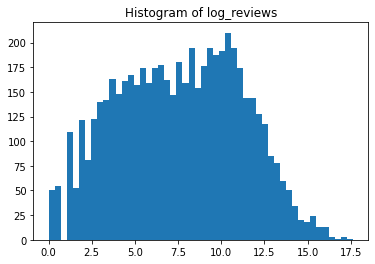

In [ ]:
log_reviews_data = np.log(all_train_data["Reviews"])
plt.hist(log_reviews_data, bins=50)
plt.title("Histogram of log_reviews")
plt.show()

Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î∂ÑÌè¨Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

`Reviews` ÌîºÏ≤òÏùò ÏµúÏÜåÍ∞íÏù¥ 1Ïù¥ÏóàÍ∏∞ÎïåÎ¨∏Ïóê Îî∞Î°ú Ìé∏Ìñ•ÏùÑ ÎçîÌïòÏßÄ ÏïäÏïòÎã§.

### Size

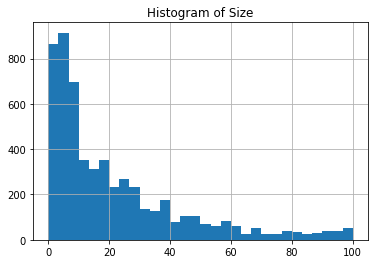

In [ ]:
all_train_data["Size"].hist(bins=30)
plt.title("Histogram of Size")
plt.show()

Îç∞Ïù¥ÌÑ∞Í∞Ä Ï¢åÌé∏Ìñ•ÎêòÏñ¥ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏßÑÌñâÌïòÍ≥† Îã§Ïãú ÌôïÏù∏ÌñàÎã§.

ÌïòÏßÄÎßå ÏµúÏÜåÍ∞íÏù¥ 0Ïóê Í∑ºÏ†ëÌïú Í∞íÏù¥ ÏûàÏóàÍ∏∞ ÎïåÎ¨∏Ïóê 1ÏùÑ ÎçîÌï¥ Î°úÍ∑∏ Î≥ÄÌñ•ÏùÑ ÏàòÌñâÌñàÎã§.

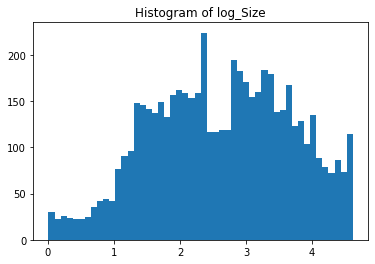

In [ ]:
log_Size_data = np.log(all_train_data["Size"] + 1)
plt.hist(log_Size_data, bins=50)
plt.title("Histogram of log_Size")
plt.show()

ÌÅ∞ Ïù¥ÏÉÅ ÏóÜÏù¥ Ïûò Î∂ÑÌè¨Ìïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

### Installs
ÏïûÏÑú Î∂ÑÏÑùÌñàÎìØ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú Í∞ÑÏ£ºÌïòÍ≥† ÌëúÏãúÌï¥ Î≥¥Í≤†Îã§.

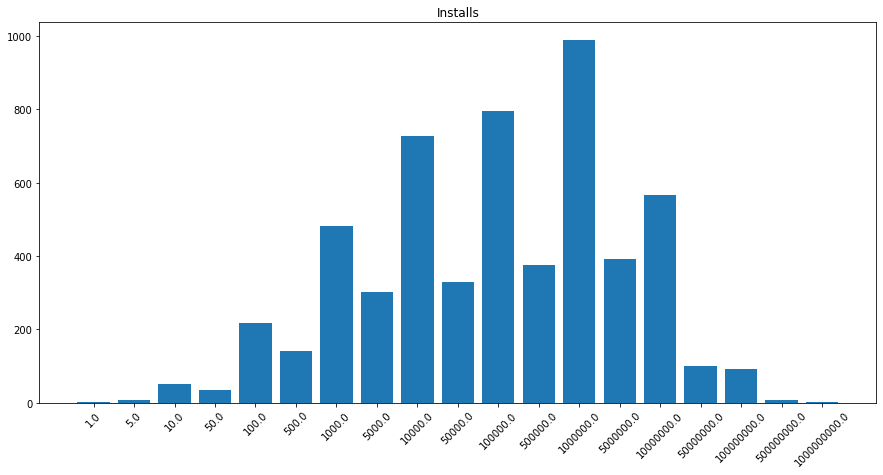

In [ ]:
grouped_data = all_train_data.groupby(['Installs'], as_index=False).count()
plt.figure(figsize = (15,7))
plt.bar(grouped_data['Installs'].astype(str), grouped_data['Id']) # astypeÏùÑ ÌÜµÌï¥ string Î≥ÄÌôò
plt.title("Installs")
plt.xticks(rotation=45) 
plt.show()

ÌÅ∞ Î¨∏Ï†ú ÏóÜÏù¥ Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ ÎπÑÏä∑Ìïú Î™®ÏñëÏùÑ Í∞ñÎäîÎã§. (Ïó∞ÏÜçÌòï Î≥ÄÏàòÏòÄÍ∏∞ ÎïåÎ¨∏Ïóê)

Îã®ÏßÄ ÏïûÏûêÎ¶¨Í∞Ä 5Ïù∏ Î≤îÏ£ºÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°∞Í∏àÏî© Ï†ÅÏùÄ Î™®ÏäµÏùÑ Î≥¥Ïù¥ÎäîÎç∞ Ï°∞Í∏à Îçî ÌôïÏù∏Ìï¥ÏïºÌï† Î∂ÄÎ∂ÑÏúºÎ°ú Î≥¥Ïù∏Îã§. (Î∞òÏò¨Î¶ºÏùÑ ÌïòÎäî Î∞©Î≤ïÏùò Ï∞®Ïù¥Î°ú Ï∂îÏ∏°Ïù¥ ÎêúÎã§.)

Îî∞ÎùºÏÑú Î≤îÏ£ºÎ•º Ï°∞Í∏à Îçî ÌÅ¨Í≤å Î¨∂Ïñ¥ÏÑú 10Ïùò Ï†úÍ≥±Îã®ÏúÑÎ°úÎßå Í≥ÑÏÇ∞Ìï¥ Î≥¥Í∏∞Î°ú ÌñàÎã§.



In [ ]:
bins = [1*(10**i) for i in range(0,10)] # 1Î∂ÄÌÑ∞ 1e9ÍπåÏßÄ Íµ¨Í∞Ñ ÏÉùÏÑ±
bin_label = [str(label) + '+' for label in bins] # Íµ¨Í∞ÑÏóê + ÏùÑ Î∂ôÏó¨ Î†àÏù¥Î∏î ÏÉùÏÑ±
cut_installs = pd.cut(all_train_data["Installs"], bins = bins, right=True, labels=bin_label[:-1]) # 10Ïùò ÏßÄÏàòÎ∞∞ Íµ¨Í∞ÑÏúºÎ°ú cutting

In [ ]:
cut_installs # Ïûò ÎÇòÎà†Ï°åÎã§?

0           1000+
1         100000+
2        1000000+
3       10000000+
4          10000+
          ...    
5611      100000+
5612      100000+
5613        1000+
5614       10000+
5615          10+
Name: Installs, Length: 5616, dtype: category
Categories (9, object): ['1+' < '10+' < '100+' < '1000+' ... '100000+' < '1000000+' < '10000000+' <
                         '100000000+']

#### (Í∏∞Î°ù) Ïò§Î•òÏàòÏ†ï
ÏúÑ Î∞©Î≤ïÏúºÎ°ú ÏßÑÌñâÌñàÎäîÎç∞ NaNÍ∞íÏù¥ ÌôïÏù∏ÎêòÏñ¥ ÏàòÏ†ïÏùÑ ÏßÑÌñâÌñàÎã§.

`pd.cut()` Ìï®ÏàòÎäî ÏôºÏ™Ω Í≤ΩÍ≥ÑÍ∞íÏùÑ Ìè¨Ìï®ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Îã§Ïö¥Î°úÎìú ÏàòÍ∞Ä 1Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî Ìè¨Ìï®ÎêòÏßÄ ÏïäÏïòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.

In [ ]:
cut_installs.unique() # NaN Í∞íÏù¥ ÌôïÏù∏ÎêòÏñ¥ Ï≤¥ÌÅ¨

['1000+', '100000+', '1000000+', '10000000+', '10000+', '100+', '100000000+', '10+', '1+', NaN]
Categories (9, object): ['1+' < '10+' < '100+' < '1000+' ... '100000+' < '1000000+' < '10000000+' <
                         '100000000+']

In [ ]:
all_train_data[cut_installs.isnull() == True] # NullÏù∏ Î∂ÄÎ∂ÑÏùò Index Ï≤¥ÌÅ¨

App Category  Rating  ...   Genres  Last Updated    Id
1436  KBA-EZ Health Guide  MEDICAL     5.0  ...  Medical    2018-08-02  1436
3646             Ra Ga Ba     GAME     5.0  ...   Arcade    2017-02-08  3646

[2 rows x 12 columns]

In [ ]:
all_train_data[all_train_data['Installs'] == 1] # 1ÏùºÎïå NaN Í∞íÏúºÎ°ú Î≥ÄÌôòÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§.

App Category  Rating  ...   Genres  Last Updated    Id
1436  KBA-EZ Health Guide  MEDICAL     5.0  ...  Medical    2018-08-02  1436
3646             Ra Ga Ba     GAME     5.0  ...   Arcade    2017-02-08  3646

[2 rows x 12 columns]

In [ ]:
# Í∞úÏàòÍ∞Ä ÏñºÎßà ÎêòÏßÄ ÏïäÍ≥†, Î™®Îëê 1Ïù¥ÏóàÍ∏∞ ÎïåÎ¨∏Ïóê ÏàòÏûëÏóÖÏúºÎ°ú ÎåÄÏ≤¥ÌñàÎã§.
cut_installs[1436] = '1+'
cut_installs[3646] = '1+'

In [ ]:
cut_installs.isnull().sum() # NaNÍ∞íÏùÑ Ï†úÍ±∞ÌñàÎã§.

0

In [ ]:
cut_installs.value_counts().sort_index()

1+              61
10+            254
100+           621
1000+         1030
10000+        1124
100000+       1364
1000000+       959
10000000+      193
100000000+      10
Name: Installs, dtype: int64

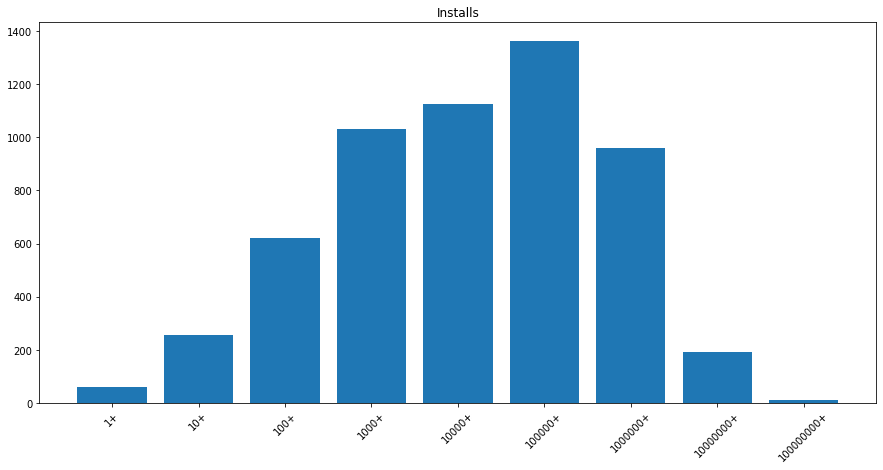

In [ ]:
plt.figure(figsize = (15,7))
plt.bar(sorted(cut_installs.unique().astype(str)), cut_installs.value_counts().sort_index()) # astypeÏùÑ ÌÜµÌï¥ string Î≥ÄÌôò
plt.title("Installs")
plt.xticks(rotation=45) 
plt.show()

Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäî Í≤É Ï≤òÎüº Í∑∏Î†§ÏßÑÎã§.

ÏàòÏπòÌòïÏúºÎ°ú Ìï¥ÏÑùÌï¥ÏÑú ÏÇ¨Ïö©Ìï† ÏàòÎèÑ ÏûàÏùÑ Í≤É Í∞ôÎã§.

### Type

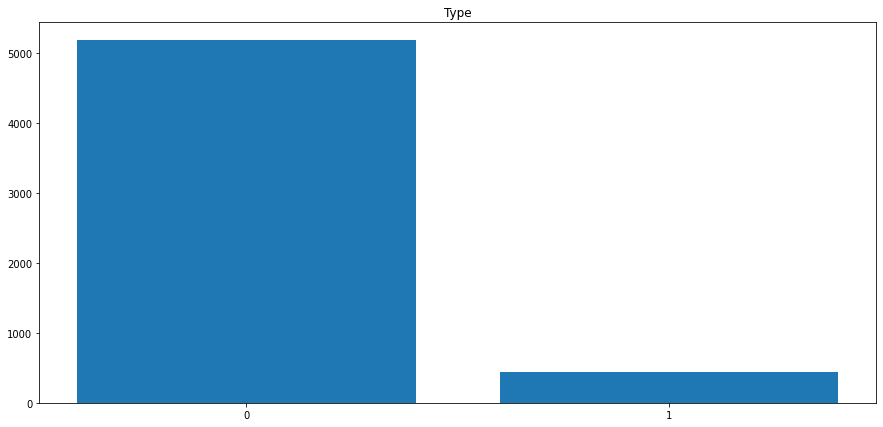

In [ ]:
grouped_data = all_train_data.groupby(['Type'], as_index=False).count()
plt.figure(figsize = (15,7))
plt.bar(['0','1'], grouped_data['Id'])
plt.title("Type")
plt.show()

`Type`Ïù¥ 0Ïù∏ Í≤ÉÏù¥ 1Ïù∏ Í≤ÉÏóê ÎπÑÌï¥ Îß§Ïö∞ ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÌôïÏù∏ÎêúÎã§.


### Price

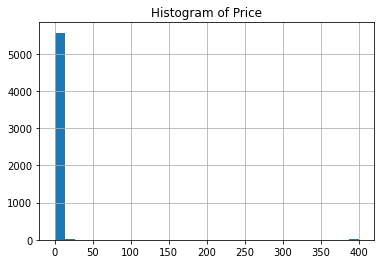

In [ ]:
all_train_data["Price"].hist(bins=30)
plt.title("Histogram of Price")
plt.show()

400Î∂àÏóê Í∞ÄÍπåÏö¥ Ïï±Ïù¥ Í¥ÄÏ∏°Ïù¥ ÎêòÏóàÎã§.

Îç∞Ïù¥ÌÑ∞Î•º Ï≤¥ÌÅ¨Ìï¥ Î≥¥Ïûê.

In [ ]:
all_train_data[all_train_data['Price'] > 100] # 100Îã¨Îü¨Í∞Ä ÎÑòÏñ¥Í∞ÄÎäî Ïï± ÌôïÏù∏

App   Category  ...  Last Updated    Id
2392          most expensive app (H)     FAMILY  ...    2018-07-16  2392
2506                      üíé I'm rich  LIFESTYLE  ...    2018-03-11  2506
2510        I'm Rich - Trump Edition  LIFESTYLE  ...    2018-05-03  2510
3232                       I am rich  LIFESTYLE  ...    2018-01-12  3232
3234                  I am Rich Plus     FAMILY  ...    2018-05-19  3234
3235                   I am rich VIP  LIFESTYLE  ...    2018-07-21  3235
3236               I Am Rich Premium    FINANCE  ...    2017-11-12  3236
3237             I am extremely Rich  LIFESTYLE  ...    2018-07-01  3237
3238                      I am Rich!    FINANCE  ...    2017-12-11  3238
3239              I am rich(premium)    FINANCE  ...    2017-05-01  3239
3242                   I Am Rich Pro     FAMILY  ...    2017-05-30  3242
3244  I am rich (Most expensive app)    FINANCE  ...    2017-12-06  3244
3246                       I Am Rich     FAMILY  ...    2018-06-22  3246
3249                       I am Rich    FINANCE  ...    2018-03-22  3249
3253              I AM RICH PRO PLUS    FINANCE  ...    2018-06-25  3253

[15 rows x 12 columns]

Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï¥ Î≥¥Îãà Î™®Îì† Ïï±Ïù¥ Îã§ "I am Rich" Í¥ÄÎ†® Ïï±Ïù¥Îã§.

Ïù¥Îü∞ Ïï±ÏùÄ Í∏∞Îä•Ïù¥ ÏóÜÏßÄÎßå ÎπÑÏãº Í∞ÄÍ≤©ÏùÑ Ï±ÖÏ†ïÌï¥ Í¥ÄÏã¨ÏùÑ Ïú†ÎèÑÌïòÍ≥†, Í≥ºÏãúÎ•º ÏúÑÌï¥ Íµ¨Îß§ÌïòÎäî Ïï±Ïù¥Îã§. 

Îî∞ÎùºÏÑú Ïù¥ÏôÄ Í∞ôÏù¥ ÎπÑÏãº Í∞ÄÍ≤©ÏùÄ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÌåêÎã®ÎêòÏóàÎã§.

ÌïòÏßÄÎßå Í∏àÏï°Ïù¥ Îß§Ïö∞ Ïª§ÏÑú Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ∏∞ Ïñ¥Î†µÍ∏∞ ÎïåÎ¨∏Ïóê Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâÌñàÎã§.

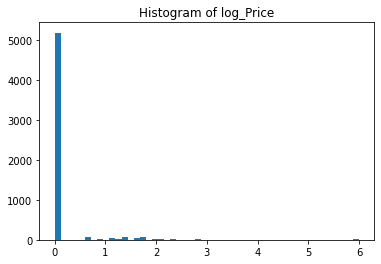

In [ ]:
log_Price_data = np.log(all_train_data["Price"] + 1) # Í∞ÄÍ≤©Ïù¥ 0Ïù∏ Ïï±Ïù¥ ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê 1ÏùÑ ÎçîÌñàÎã§.
plt.hist(log_Price_data, bins=50)
plt.title("Histogram of log_Price")
plt.show()

In [ ]:
log_Price_data[log_Price_data < 1].value_counts()

0.000000    5175
0.688135      79
0.912283      22
0.993252       2
0.828552       1
0.959350       1
0.951658       1
0.916291       1
Name: Price, dtype: int64

0Ïù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Îß§Ïö∞ ÎßéÏïÑ Í∑∏ÎûòÌîÑÍ∞Ä Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Í∑∏Î†§ÏßÄÏßÄ ÏïäÎäîÎã§.

### Content Rating

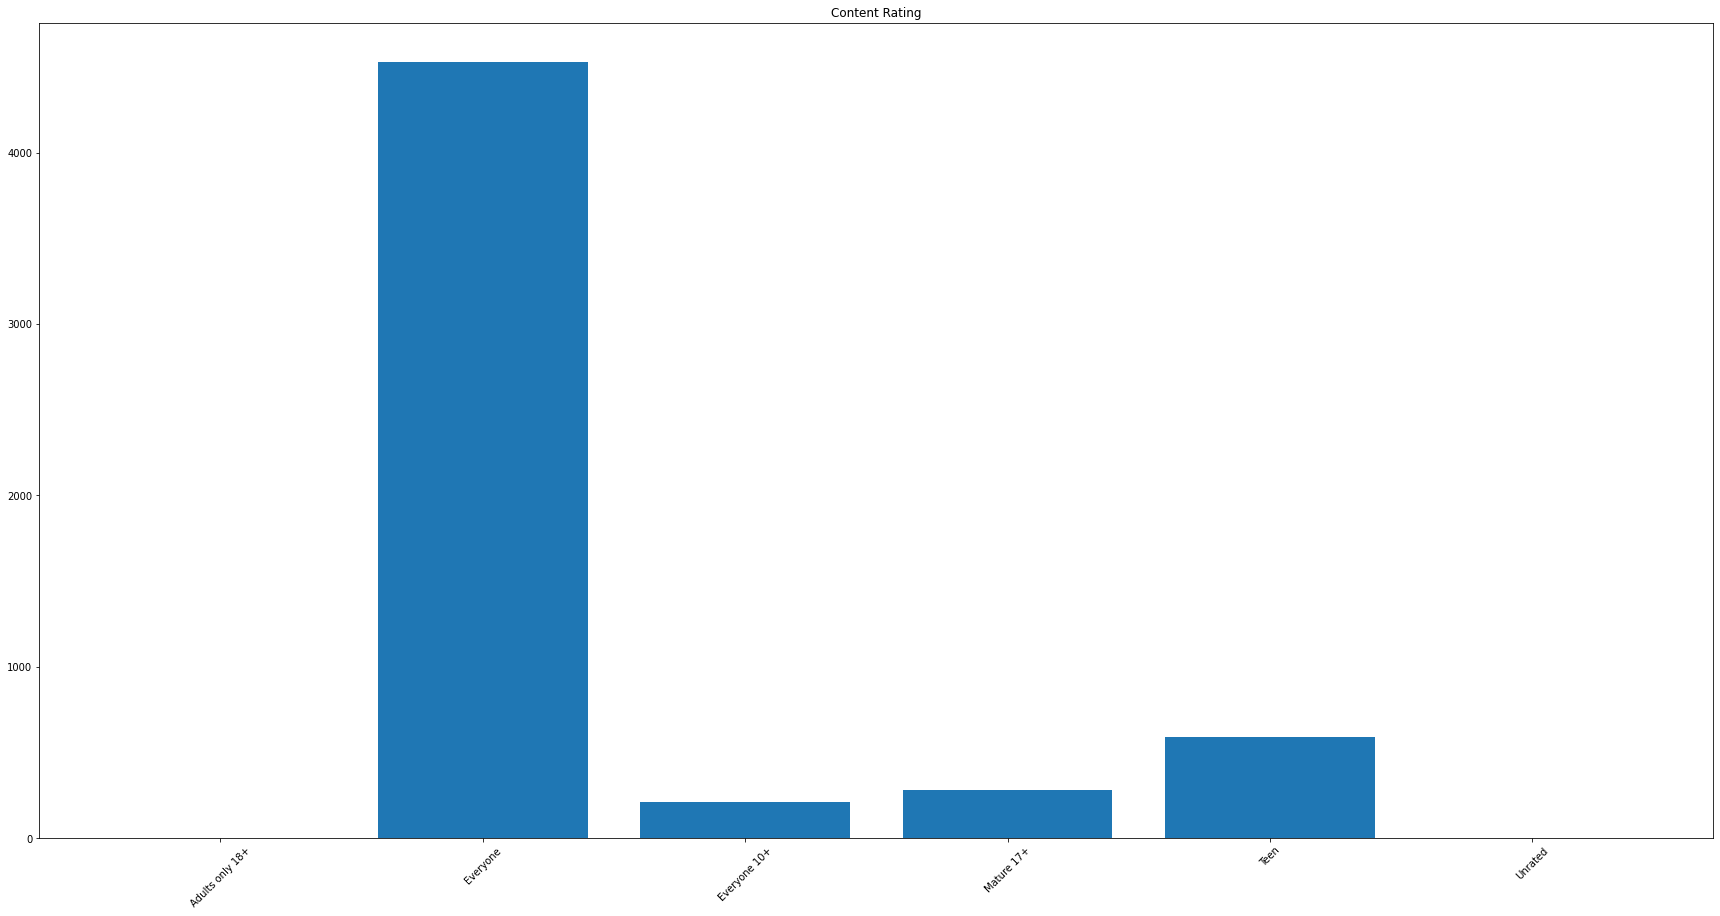

In [ ]:
grouped_data = all_train_data.groupby(['Content Rating'], as_index=False).count()
plt.figure(figsize = (30,15))
plt.bar(grouped_data['Content Rating'].values, grouped_data['Id'])
plt.title("Content Rating")
plt.xticks(rotation=45) 
plt.show()

ÎåÄÎ∂ÄÎ∂ÑÏùò Ïï±Ïù¥ "Everyone" Îì±Í∏âÏù¥Îã§.

"Unrated"Îäî Í≤∞Ï∏°ÏπòÎ°ú ÏÉùÍ∞ÅÌï† ÏàòÎèÑ ÏûàÏßÄÎßå, Ï†úÏûëÏûêÍ∞Ä Í¥ÄÎ¶¨Î•º ÌïòÏßÄ ÏïäÏïÑ Îì±Í∏âÏù¥ ÏóÜÎäî Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÎê† Ïàò ÏûàÏñ¥ ÌèâÏ†êÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ Ï§Ñ Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌñàÎã§.

### Genres

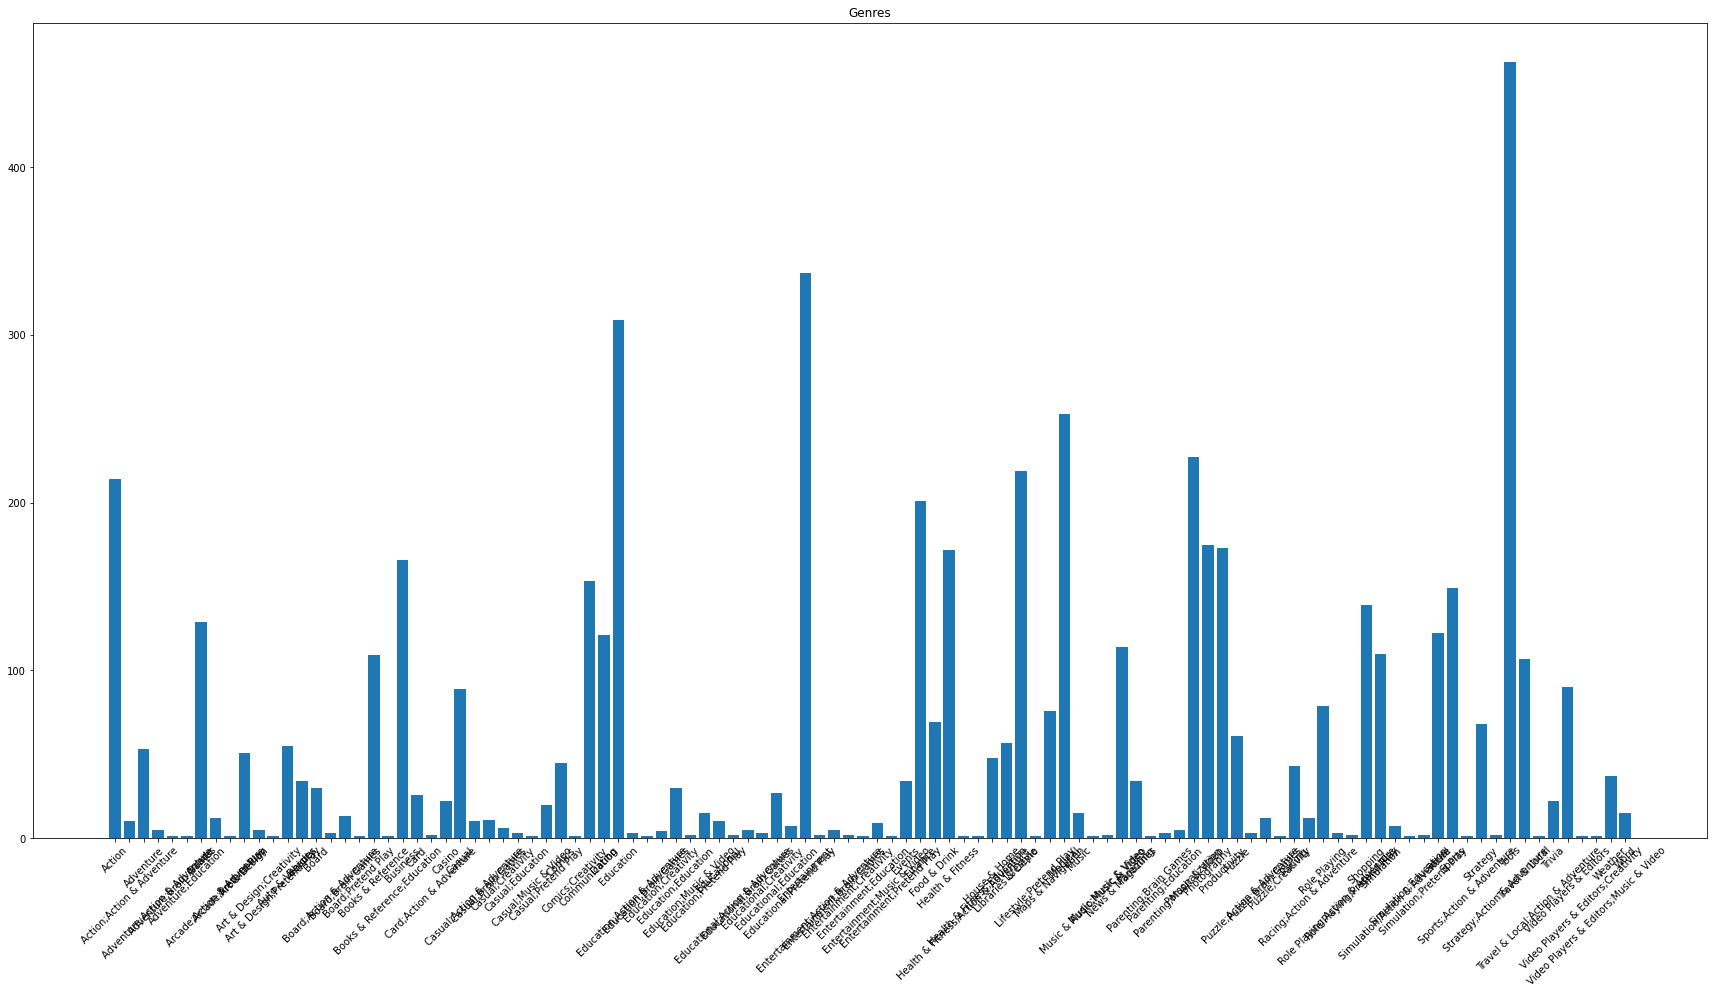

In [ ]:
grouped_data = all_train_data.groupby(['Genres'], as_index=False).count()
plt.figure(figsize = (30,15))
plt.bar(grouped_data['Genres'].values, grouped_data['Id'])
plt.title("Genres")
plt.xticks(rotation=45) 
plt.show()

ÏïûÏÑú ÎßêÌñàÎìØ `Genres` Îäî `Category` Ïùò ÌïòÏúÑ Î∂ÑÏïºÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïã§Ï†ú ÏòàÏ∏°Ìï† 

Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏Ìï¥ Î≥º ÎïåÎèÑ Îß§Ïö∞ ÎßéÏùÄ ÏàòÏùò Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

Îß§Ïö∞ Ï†ÅÏùÄ ÏàòÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÇòÌÉÄÎÇ¨Í∏∞ ÎïåÎ¨∏Ïóê ÏùºÏ†ï Ïàò Ïù¥ÌïòÏùò Îç∞Ïù¥ÌÑ∞Î•º Î¨∂Ïñ¥ Ï£ºÍ≥†Ïûê ÌïúÎã§.

In [15]:
tmp_genres = all_train_data['Genres'].copy()
tmp_genres = tmp_genres.map(lambda x: x if tmp_genres.value_counts().loc[x] > 5 else 'Others') # Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÍ∞Ä 5Í∞ú Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îßå ÏÇ¥Î¶¨Í≥† ÎÇòÎ®∏ÏßÄÎäî Ï†ÑÎ∂Ä OthersÎ°ú Î≥¥ÎÇ∏Îã§.

tmp_genres.value_counts()

Tools                            463
Entertainment                    337
Education                        309
Medical                          253
Personalization                  227
                                ... 
Educational                       10
Entertainment;Music & Video        9
Simulation;Action & Adventure      7
Educational;Pretend Play           7
Casual;Creativity                  6
Name: Genres, Length: 63, dtype: int64

In [24]:
len(tmp_genres.value_counts().index) # Ï¥ù 63Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏ Í∞ÄÎä•

63

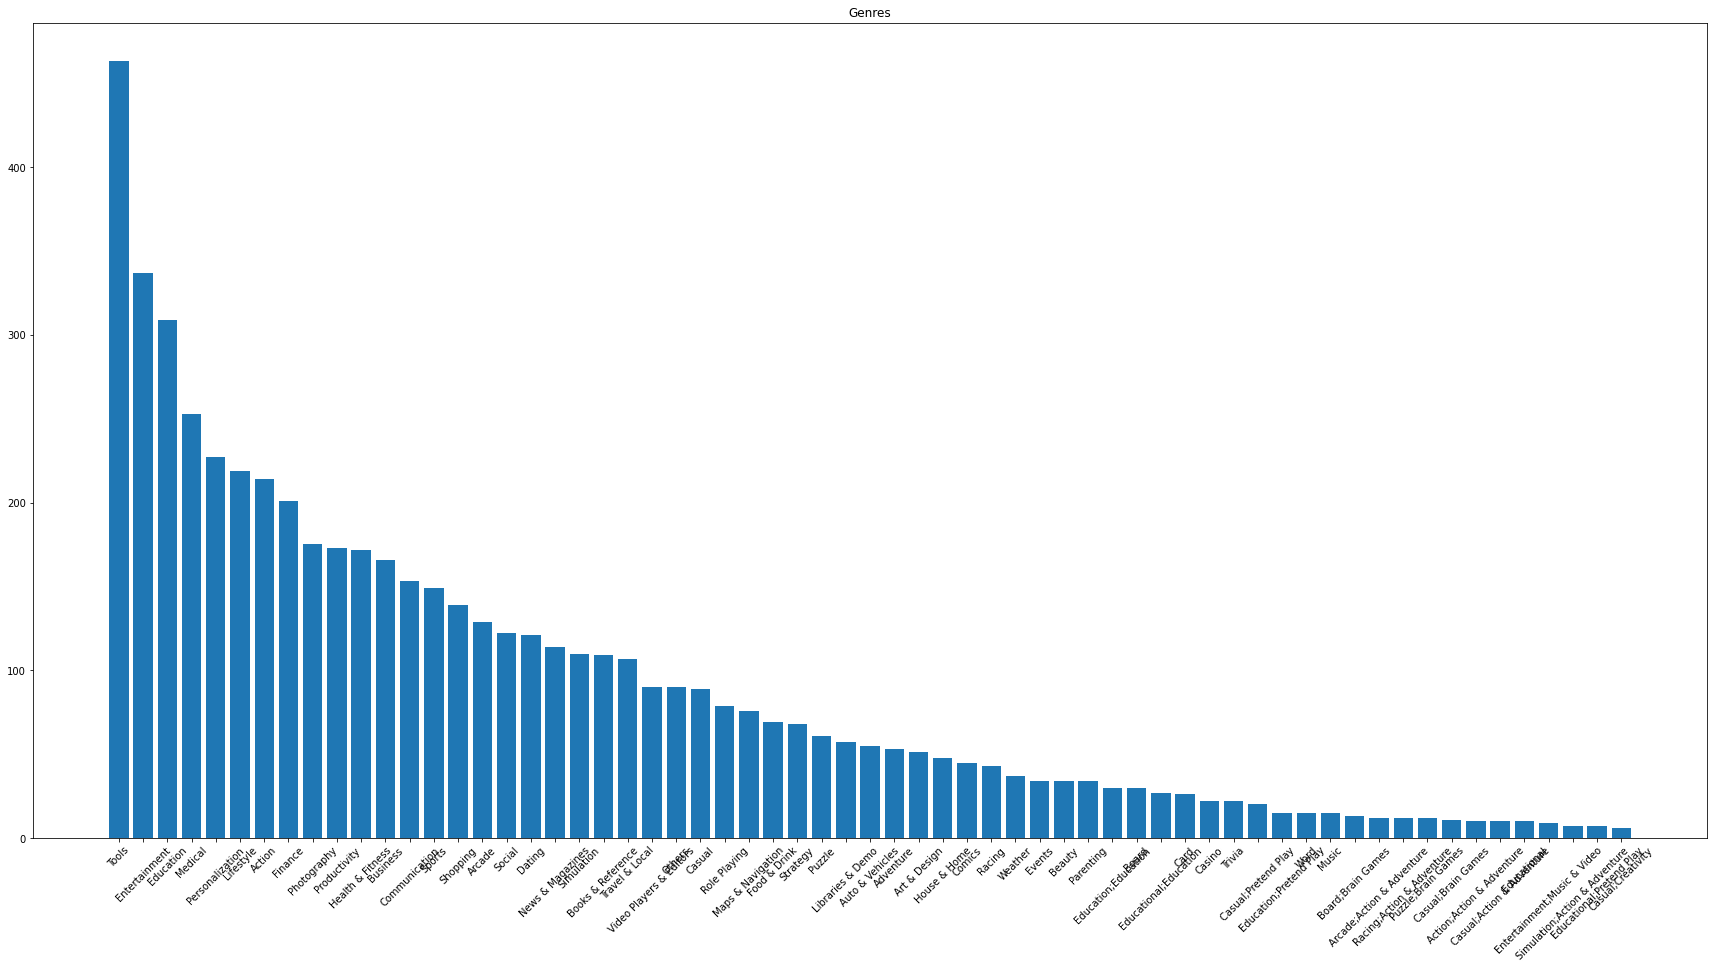

In [23]:
plt.figure(figsize = (30,15))
plt.bar(tmp_genres.value_counts().index, tmp_genres.value_counts())
plt.title("Genres")
plt.xticks(rotation=45) 
plt.show()

### Last Updated

- `Last Updated` Îäî ÎÇ†ÏßúÎ•º ÎÇòÌÉÄÎÇ¥Îäî Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.
- ÏµúÍ∑º ÏóÖÎç∞Ïù¥Ìä∏ ÎÇ†ÏßúÍ∞Ä Ïò§ÎûòÎê† ÏàòÎ°ù, ÌèâÏ†êÏù¥ ÎÇÆÏùÑ Í≤ÉÏúºÎ°ú Ï∂îÏ∏°ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê ÏÇ¨Ïö©Ìï¥ Î≥¥Í∏∞Î°ú ÌñàÎã§.
- ÎÇ†Ïßú Í∞ùÏ≤¥Î•º Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©Ìï¥ Î≥¥Í≥†Ïûê ÌïúÎã§.

In [ ]:
modified_updated = np.log(pd.to_datetime(all_train_data['Last Updated']).astype(int))

# Î™®Îëê datetime Í∞ùÏ≤¥Î°ú Î≥ÄÌôòÌïú Îí§Ïóê intÎ°ú Î≥ÄÌôòÌïòÏó¨ ÎÇ†ÏßúÎ≥Ñ Í≥†Ïú†Î≤àÌò∏Î•º Î∂àÎü¨Ïò®Îã§.
# ÏàòÍ∞Ä Îß§Ïö∞ ÌÅ¨ÎØÄÎ°ú Î°úÍ∑∏Î≥ÄÌôòÏùÑ Ï∑®Ìï¥Ï§ÄÎã§.


In [ ]:
modified_updated

0       41.862134
1       41.862590
2       41.873812
3       41.870764
4       41.871442
          ...    
5611    41.862533
5612    41.860936
5613    41.865095
5614    41.868557
5615    41.873304
Name: Last Updated, Length: 5616, dtype: float64

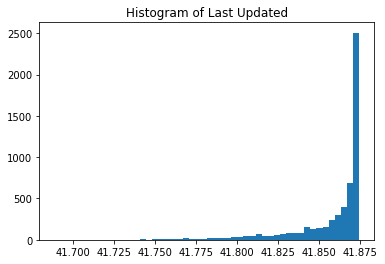

In [ ]:
plt.hist(modified_updated, bins=50)
plt.title("Histogram of Last Updated")
plt.show()

Îç∞Ïù¥ÌÑ∞Í∞Ä Ïö∞Ìé∏Ìñ•Îêú Î™®ÏäµÏù¥ Î≥¥Ïù∏Îã§.
ÏµúÍ∑ºÏóê ÏóÖÎç∞Ïù¥Ìä∏ Îêú Ïï±Ïù¥ ÎßéÍ∏∞ ÎïåÎ¨∏ÏúºÎ°ú Ï∂îÏ†ïÎêúÎã§.

### App

`App`Ïùò Í≤ΩÏö∞ Ï≤òÏùåÏóêÎäî Î≤ÑÎ¶¨Í∏∞Î°ú ÌñàÏúºÎÇò, Ïï±Ïùò Ïù¥Î¶ÑÏùÑ Î≥¥Í≥† Ïú†ÏùòÎØ∏Ìïú Í∞íÏùÑ Îã¥ÏùÑ ÏàòÎèÑ ÏûàÏùÑ Í≤ÉÏù¥Îùº ÌåêÎã®ÌïòÏó¨ ÏûëÏóÖÌï¥ Î≥¥Í∏∞Î°ú ÌñàÎã§.

Ïö∞ÏÑ† Ïï±Ïùò Ïù¥Î¶ÑÏùò Í∏∏Ïù¥Î•º Íµ¨Ìï¥ Î≥¥Í≥†, Ïï±Ïùò Ïù¥Î¶ÑÏóê Îì§Ïñ¥Í∞ÄÎäî Îã®Ïñ¥Î•º Î∂ÑÏÑùÌï¥ Î≥¥Í∏∞Î°ú ÌïòÏòÄÎã§.

In [26]:
all_train_data['App']

0          Photo Editor & Candy Camera & Grid & ScrapBook
1                                     Coloring book moana
2       U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...
3                                   Sketch - Draw & Paint
4                   Pixel Draw - Number Art Coloring Book
                              ...                        
5611                                            Dr. Chess
5612                                 Super Dr. Parking 3D
5613                                   Dr Dre - Beatmaker
5614                     Dr. Cares - Amy's Pet Clinic üêà üêï
5615                   Dr. Splorchy Presents Space Heroes
Name: App, Length: 5616, dtype: object

In [27]:
len_app = all_train_data['App'].map(lambda x: len(x))
len_app

0       46
1       19
2       50
3       21
4       37
        ..
5611     9
5612    20
5613    18
5614    32
5615    34
Name: App, Length: 5616, dtype: int64

In [31]:
plt.hist(len_app, bins=50)
plt.title("Histogram of len_app")
plt.show()

Îç∞Ïù¥ÌÑ∞Í∞Ä Ï¢åÌé∏Ìñ•Îêú Î™®ÏäµÏù¥ Î≥¥Ïù∏Îã§. (Í∞ÄÎÅî Ïù¥Î¶ÑÏù¥ Îß§Ïö∞ Í∏¥ Ïï± Îì§Ïù¥ Ï°¥Ïû¨ÌïúÎã§.)

Îî∞ÎùºÏÑú Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâÌï¥ Ï£ºÍ≤†Îã§.

In [33]:
plt.hist(np.log(len_app), bins=50)
plt.title("Histogram of log_len_app")
plt.show()

Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Ï°∞Í∏à Îçî Í∑ºÏÇ¨Ìï¥ÏßÑ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

ÏïûÏóêÏÑú "I'm Rich" ÏôÄ Í∞ôÏùÄ ÏÇ¨Î°ÄÎ°ú Î≥º Îïå Ïù¥Î¶ÑÏóê ÌäπÏ†ï ÌÇ§ÏõåÎìúÍ∞Ä Îì§Ïñ¥Í∞Ñ Ïï±ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

Ïù¥Î¶ÑÏùÑ ÌÜµÌï¥ÏÑú Ïï±Ïùò ÌäπÏÑ±ÏùÑ ÎÇòÌÉÄÎÇº Ïàò ÏûàÏúºÎØÄÎ°ú Ïï±Ïùò Ïù¥Î¶ÑÏóê Îì§Ïñ¥Í∞Ñ Îã®Ïñ¥Î•º Î∂ÑÏÑùÌïòÎ©¥ Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùÑ Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÎêúÎã§.

In [45]:
# Ï†ÑÏ≤¥ Ïï±Ïùò Ïù¥Î¶ÑÏùÑ ÏÜåÎ¨∏ÏûêÌôîÌïòÏó¨ ÏßÑÌñâ.
lower_name = all_train_data['App'].map(lambda x: x.lower().split()) # ÏÜåÎ¨∏ÏûêÌôîÌïòÍ≥† Îã®Ïñ¥Î°ú Î∂ÑÌï†

def get_corpus(data):
  return [word for row in data for word in row] # Í∞Å Îã®Ïñ¥Îì§ÏùÑ ÌïòÎÇòÏùò Î∞∞Ïó¥Ïóê Îã¥Ïùå

corpus = pd.Series(get_corpus(lower_name)) # Îã¥ÏùÄ Îã®Ïñ¥Îì§ÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
shorten_corpus = corpus.map(lambda x: x if len(x) >= 3 else None) # Îã®Ïñ¥Í∞Ä 3Í∏ÄÏûê Ïù¥ÏÉÅÏù∏ Í≤ÉÎßå Ï≥ê ÎÇ¥Í∏∞
graph_data = shorten_corpus.value_counts()[:200]

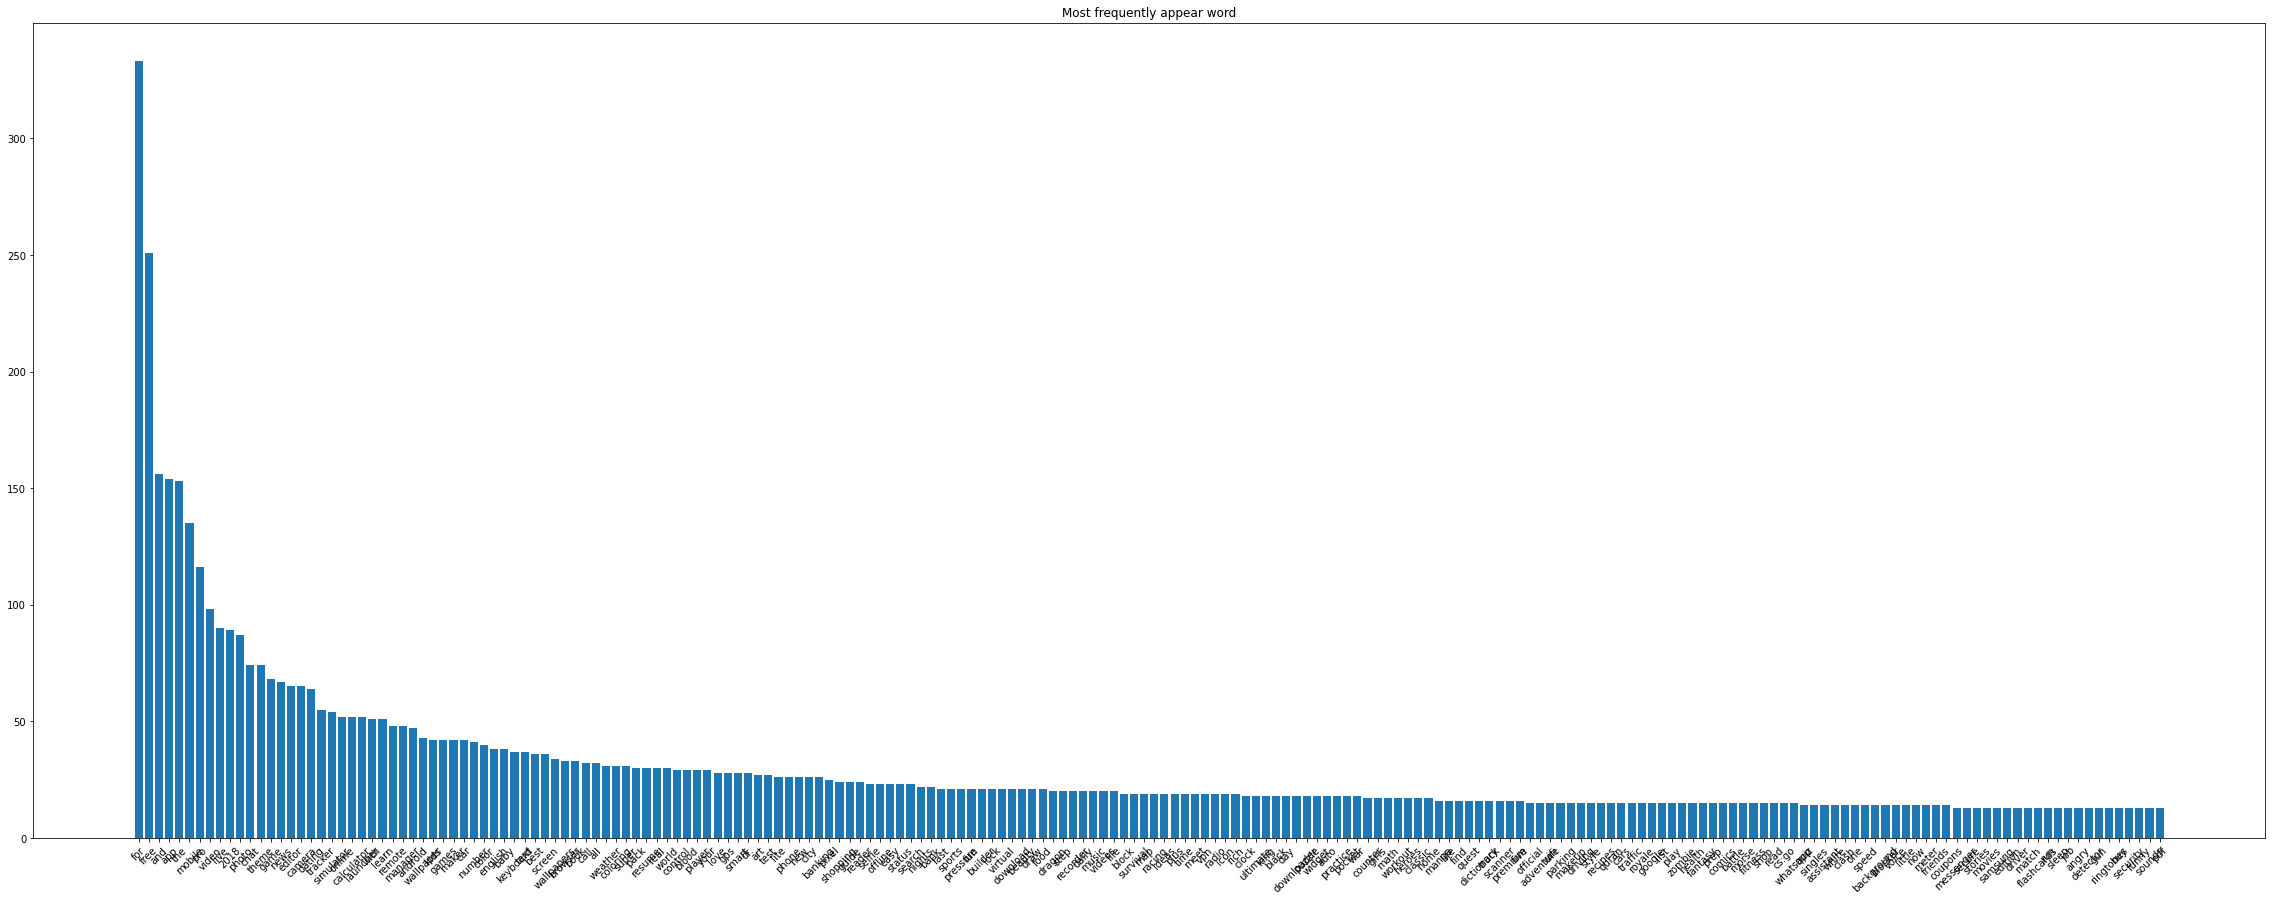

In [48]:
plt.figure(figsize = (40,15))
plt.bar(graph_data.index, graph_data.values)
plt.title("Most frequently appear word")
plt.xticks(rotation=45) 
plt.show()

ÏÉÅÏúÑ 200Í∞ú Îã®Ïñ¥Îßå Í≥†Î†§Ìï¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†Îã§.

ÏòàÏÉÅ ÎåÄÎ°ú free, tracker, weather, screen, calculator Îì±Í≥º Í∞ôÏù¥ Ïï±Ïùò ÌäπÏßïÏùÑ Ïûò Î≥¥Ïó¨Ï£ºÎäî Ïù¥Î¶ÑÏù¥ ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.

## Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò

ÏïûÏÑ† Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ÏóêÍ≤å ÌïÑÏöîÌñàÎçò Ï≤òÎ¶¨Î•º Ï†ïÎ¶¨ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

- Îç∞Ïù¥ÌÑ∞Ïùò Ïù¥ÏÉÅÏπòÎäî ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÏñ¥ Îî∞Î°ú Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÏïòÎã§.
- `App`Ïùò Í≤ΩÏö∞ Ïù¥Î¶ÑÏùò Í∏∏Ïù¥(Î°úÍ∑∏Î≥ÄÌôò)ÏôÄ, Ïù¥Î¶ÑÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•ÌïòÎäî 200Í∞úÏùò Îã®Ïñ¥Î•º ÏÑ†Ï†ïÌïòÏó¨ Ìè¨Ìï® Ïú†Î¨¥Î•º Ï∏°Ï†ïÌñàÎã§. (ÎÇòÏ§ëÏóê ÏßÑÌñâÌï®)
- `Category`Ïùò Í≤ΩÏö∞ Ï¥ù Í∞úÏàòÍ∞Ä 33Í∞úÏòÄÎã§. GenresÏùò ÌïòÏúÑÌò∏ÌôòÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïòÎã§.
- `Rating`Ïùò Í≤ΩÏö∞ ÏòàÏ∏°Î≥ÄÏàòÎ°úÏç® Ïñ¥Îñ†Ìïú Ï≤òÎ¶¨ÎèÑ ÌïòÏßÄ ÏïäÏïòÎã§. Ï∞®ÌõÑ Ï†úÍ±∞ ÏòàÏ†ï
- `Reviews` Ïùò Í≤ΩÏö∞ Ìé∏Ï∞®Í∞Ä Ïª§ÏÑú Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâÌï¥ ÌôïÏù∏ÌñàÎã§.
- `Size` Ïùò Í≤ΩÏö∞ Ìé∏Ï∞®Í∞Ä Ïª§ÏÑú Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâÌï¥ ÌôïÏù∏ÌñàÎã§.
- `Installs`Ïùò Í≤ΩÏö∞ ÌÅ∞ ÏàòÏóêÏÑú Î∞òÏò¨Î¶ºÎêòÏñ¥ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú Ï∑®Í∏âÌïòÏó¨ Í≥ÑÏÇ∞ÌïúÎã§. ÏïûÏûêÎ¶¨Í∞Ä 5Ïù∏ Í≥ÑÏó¥ÏóêÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä Îì§Ïë•ÎÇ†Ïë•Ìïú Î™®ÏäµÏù¥ Î≥¥Ïó¨ 10 Îã®ÏúÑÎ°ú Î¨∂Ïñ¥ÏÑú Í≥ÑÏÇ∞ÌñàÎã§. Îã§Ïö¥Î°úÎìú ÏàòÍ∞Ä 1Ïù∏ Ïï±ÏùÄ 1+ Î≤îÎ°ÄÎ°ú ÎÑ£Ïñ¥ Ï£ºÏóàÎã§.
- `Type`Ïùò Í≤ΩÏö∞Îäî ÌäπÎ≥ÑÌïú Ï≤òÎ¶¨Î•º ÌïòÏßÄ ÏïäÎäîÎã§.
- `Price`Ïùò Í≤ΩÏö∞ ÏûêÎ¶¨ÏàòÍ∞Ä Îß§Ïö∞ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâÌñàÎã§.
- `Content Rating` Ïùò Í≤ΩÏö∞Îäî ÌäπÎ≥ÑÌïú Ï≤òÎ¶¨Î•º ÌïòÏßÄ ÏïäÎäîÎã§.
- `Genres` Îäî `Category` ÏôÄ Í≤πÏπòÎäî Î≥ÄÏàòÎ°ú, Ïï±Ïù¥ 5Í∞ú Ïù¥ÌïòÏù∏ Ïû•Î•¥Îäî Í∏∞ÌÉÄÎ°ú Îî∞Î°ú Î∂ÑÎ•òÌñàÎã§.
- `Last Updated` Îäî Í≥†Ïú† Î≤àÌò∏Î°ú Î≥ÄÌôòÌïòÍ≥† Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâÌñàÎã§.

ÏúÑ Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Ï≤òÎ¶¨ÌïòÍ≤†Îã§.


In [7]:
def preprocess_data(data):

  # ÌäπÎ≥ÑÌïú Ï≤òÎ¶¨Î•º ÌïòÏßÄ ÏïäÎäî ColumnsÎì§
  nothing_modify = ['Type', 'Content Rating', 'Installs', 'App', 'Genres'] # Ï∞®ÌõÑ ÌîºÏ≥ê Ï∂îÍ∞ÄÎ•º ÏúÑÌïú Installs, App, Genres Ïú†ÏßÄ

  # Ïï±Ïùò Ïù¥Î¶ÑÏùò Í∏∏Ïù¥Î•º Îã¥Îäî Series
  len_app = data['App'].map(lambda x: len(x)).rename('app_len')

  # Î°úÍ∑∏ Î≥ÄÌôò ÏàòÌñâ
  log_dfs = pd.concat([np.log(data['Reviews'] + 1), np.log(data['Size']), np.log(data['Price'] + 1), np.log(len_app)], axis=1)

  # Îã§Ïö¥Î°úÎìú ÏàòÎ•º Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÌôòÌïúÎã§.
  bins = [1*(10**i) for i in range(0,10)] # 1Î∂ÄÌÑ∞ 1e9ÍπåÏßÄ Íµ¨Í∞Ñ ÏÉùÏÑ±
  bin_label = [str(label) + '+' for label in bins] # Íµ¨Í∞ÑÏóê + ÏùÑ Î∂ôÏó¨ Î†àÏù¥Î∏î ÏÉùÏÑ±
  cut_installs = pd.cut(data["Installs"], bins = bins, include_lowest= True, labels=bin_label[:-1]).rename("install_label") # 10Ïùò ÏßÄÏàòÎ∞∞ Íµ¨Í∞ÑÏúºÎ°ú cutting
  

  # Last UpdatedÎ•º Í≥†Ïú†Î≤àÌò∏Î°ú Î≥ÄÍ≤ΩÌïòÏó¨ Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâÌïúÎã§.
  modified_last_updated = pd.Series(np.log(pd.to_datetime(data['Last Updated']).astype(int)))

  # Ìé∏ÏßëÌïú Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôòÌïúÎã§.
  new_data = pd.concat([data[nothing_modify], log_dfs, cut_installs, modified_last_updated], axis=1)

  return new_data


In [8]:
target = all_train_data["Rating"] # ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÎ¶¨
tmp_x = all_train_data.drop("Rating", axis=1)

In [9]:
train_x = preprocess_data(tmp_x)

In [10]:
train_x # Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Î≥ÄÌôòÎêòÏóàÎã§.

Type Content Rating    Installs  ...   app_len install_label  Last Updated
0        0       Everyone     10000.0  ...  3.828641         1000+     41.862134
1        0       Everyone    500000.0  ...  2.944439       100000+     41.862590
2        0       Everyone   5000000.0  ...  3.912023      1000000+     41.873812
3        0           Teen  50000000.0  ...  3.044522     10000000+     41.870764
4        0       Everyone    100000.0  ...  3.610918        10000+     41.871442
...    ...            ...         ...  ...       ...           ...           ...
5611     0       Everyone   1000000.0  ...  2.197225       100000+     41.862533
5612     0       Everyone   1000000.0  ...  2.995732       100000+     41.860936
5613     0     Mature 17+     10000.0  ...  2.890372         1000+     41.865095
5614     0       Everyone    100000.0  ...  3.465736        10000+     41.868557
5615     1     Mature 17+       100.0  ...  3.526361           10+     41.873304

[5616 rows x 11 columns]

In [11]:
train_x.isnull().sum() # ÌäπÎ≥ÑÌïú Ïò§Î•òÍ∞Ä ÏóÜÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

Type              0
Content Rating    0
Installs          0
App               0
Genres            0
Reviews           0
Size              0
Price             0
app_len           0
install_label     0
Last Updated      0
dtype: int64

## ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

In [12]:
# ÏàòÏπòÌòï Î≥ÄÏàò Î™©Î°ù
numeric_data = ['Type', 'Reviews', 'Size', 'Price', 'Last Updated', 'app_len', 'Installs']

In [13]:
# ÏÇ∞Ï†êÎèÑ ÌëúÏãú
sns.pairplot(pd.concat([train_x[numeric_data], target], axis=1)) # ÏûÑÏãúÎ°ú Ìï©Ï≥êÏÑú ÌëúÏãú

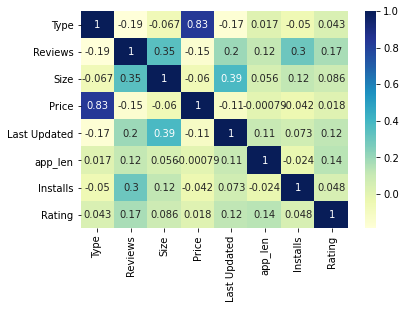

In [14]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ°ú ÌûàÌä∏Îßµ ÌëúÏãú
sns.heatmap(pd.concat([train_x[numeric_data], target], axis=1).corr(),cmap = 'YlGnBu', annot=True) # annotÎ•º ÏÇ¨Ïö©Ìï¥ Ïà´Ïûê ÌëúÏãú.
plt.show()

TypeÍ≥º PriceÏóê ÎåÄÌï¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.
Ï£ºÏùòÍ∞Ä ÌïÑÏöîÌï† Í≤É Í∞ôÎã§.

## Scaling

Îçî Í≥†ÏÑ±Îä•Ïùò ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ïä§ÏºÄÏùºÎßÅ ÌïòÍ≥†Ïûê ÌïúÎã§.

Minmax Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÎ†§Í≥† ÌïúÎã§.

In [12]:
from sklearn.preprocessing import MinMaxScaler #Ïä§ÏºÄÏùºÎü¨ ÏûÑÌè¨Ìä∏

In [13]:
scaler = MinMaxScaler()
numeric_data = ['Type', 'Reviews', 'Size', 'Price', 'Last Updated', 'app_len']
scaled_train_x = train_x.copy()
scaled_train_x[numeric_data] = scaler.fit_transform(train_x[numeric_data]) # ÏàòÏπòÌòï Î≥ÄÏàòÎì§Îßå Ïä§ÏºÄÏùºÎßÅÌï®

scaled_train_x

Type Content Rating    Installs  ...   app_len install_label  Last Updated
0      0.0       Everyone     10000.0  ...  0.726793         1000+      0.935101
1      0.0       Everyone    500000.0  ...  0.558944       100000+      0.937564
2      0.0       Everyone   5000000.0  ...  0.742621      1000000+      0.998174
3      0.0           Teen  50000000.0  ...  0.577943     10000000+      0.981711
4      0.0       Everyone    100000.0  ...  0.685462        10000+      0.985374
...    ...            ...         ...  ...       ...           ...           ...
5611   0.0       Everyone   1000000.0  ...  0.417100       100000+      0.937256
5612   0.0       Everyone   1000000.0  ...  0.568681       100000+      0.928630
5613   0.0     Mature 17+     10000.0  ...  0.548681         1000+      0.951092
5614   0.0       Everyone    100000.0  ...  0.657902        10000+      0.969790
5615   1.0     Mature 17+       100.0  ...  0.669411           10+      0.995434

[5616 rows x 11 columns]

In [14]:
scaled_train_x.describe()

Type      Installs  ...      app_len  Last Updated
count  5616.000000  5.616000e+03  ...  5616.000000   5616.000000
mean      0.078526  5.201445e+06  ...     0.566899      0.913017
std       0.269021  3.012485e+07  ...     0.109269      0.131359
min       0.000000  1.000000e+00  ...     0.000000      0.000000
25%       0.000000  1.000000e+04  ...     0.500973      0.888939
50%       0.000000  1.000000e+05  ...     0.586774      0.974684
75%       0.000000  1.000000e+06  ...     0.639215      0.993606
max       1.000000  1.000000e+09  ...     1.000000      1.000000

[8 rows x 7 columns]

## Feature Ï∂îÍ∞Ä

Îç∞Ïù¥ÌÑ∞Ïóê Î™á Í∞úÏùò ÌîºÏ≤òÎì§ÏùÑ Ï∂îÍ∞ÄÌï¥ Î≥¥Í≥†Ïûê ÌïúÎã§.

Installs ÏôÄ Ïó∞Í¥ÄÎêú Features
- `app_len` Í≥º  `Installs` Ïùò ÎπÑ
- `Reviews` ÏôÄ `Installs` Ïùò ÎπÑ
- `Size` ÏôÄ `Installs` Ïùò ÎπÑ
- `Price` ÏôÄ `Installs` Ïùò ÎπÑ
- `Last Updated` ÏôÄ `Installs` Ïùò ÎπÑ

Reviews ÏôÄ Ïó∞Í¥ÄÎêú Features
- `Size`ÏôÄ `Reviews`Ïùò ÎπÑ
- `Price`ÏôÄ `Reviews`Ïùò ÎπÑ
- `app_len`ÏôÄ `Reviews`Ïùò ÎπÑ
- `Last Updated` ÏôÄ `Reviews`Ïùò ÎπÑ

Size ÏôÄ Ïó∞Í¥ÄÎêú Features
- `Price`ÏôÄ `Size`Ïùò ÎπÑ
- `app_len`ÏôÄ `Size`Ïùò ÎπÑ
- `Last Updated` ÏôÄ `Size`Ïùò ÎπÑ

PriceÎäî 0Ïù¥ ÎßéÏïÑÏÑú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäîÎã§.

app_len ÏôÄ Ïó∞Í¥ÄÎêú Features
- `app_len`ÏôÄ `Last Updated` Ïùò ÎπÑ

Ï£ºÏöî Îã®Ïñ¥Í∞Ä Ï†úÎ™©Ïóê Îì§Ïñ¥ÏûàÎäîÏßÄ Ïú†Î¨¥


In [15]:
def get_features(data, corpus, genres_list):
  add_feat = pd.DataFrame()
  cp_data = data.copy()
  data[numeric_data] += 1

  # ÎπÑÏú® Íµ¨ÌïòÍ∏∞
  add_feat['app_len/Installs'] = data['app_len'] / data['Installs']
  add_feat['Reviews/Installs'] = data['Reviews'] / data['Installs']
  add_feat['Size/Installs'] = data['Size'] / data['Installs']
  add_feat['Price/Installs'] = data['Price'] / data['Installs']
  add_feat['Last Updated/Installs'] = data['Last Updated'] / data['Installs']

  add_feat['app_len/Reviews'] = data['app_len'] / data['Reviews']
  add_feat['Size/Reviews'] = data['Size'] / data['Reviews']
  add_feat['Price/Reviews'] = data['Price'] / data['Reviews']
  add_feat['Last Updated/Reviews'] = data['Last Updated'] / data['Reviews']

  add_feat['app_len/Size'] = data['app_len'] / data['Size']
  add_feat['Price/Size'] = data['Price'] / data['Size']
  add_feat['Last Updated/Size'] = data['Last Updated'] / data['Size']

  add_feat['app_len/Last Updated'] = data['app_len'] / data['Last Updated']

  # Îã®Ïñ¥Ïùò Ìè¨Ìï®Ïó¨Î∂Ä Ï†ïÏùò Ìñâ
  for word in corpus:
    add_feat[f"has_{word}"] = data["App"].map(lambda x: 1 if word in x.lower() else 0)

  # Ïû•Î•¥Í∞Ä Î∞õÏùÄ Î™©Î°ùÏóê ÏûàÏóàÎäîÏßÄ ÌôïÏù∏ (testÎç∞Ïù¥ÌÑ∞ ÎåÄÏùë)
  add_feat["Genres"] = data['Genres'].map(lambda x : x if x in genres_list else 'Others')

  cp_data = cp_data.drop(['App', "Installs", "Genres"], axis=1) # ÌïÑÏöîÏóÜÎäî Ìñâ Ï†ïÎ¶¨

  

  return pd.concat([cp_data, add_feat], axis=1)

In [16]:
# Ï†ÑÏ≤¥ Ïï±Ïùò Ïù¥Î¶ÑÏùÑ ÏÜåÎ¨∏ÏûêÌôîÌïòÏó¨ ÏûêÏ£º ÎÇòÏò§Îäî Îã®Ïñ¥ ÏÉÅÏúÑ 200Í∞úÎ•º Íµ¨Ìï®
lower_name = all_train_data['App'].map(lambda x: x.lower().split()) # ÏÜåÎ¨∏ÏûêÌôîÌïòÍ≥† Îã®Ïñ¥Î°ú Î∂ÑÌï†

def get_corpus(data):
  return [word for row in data for word in row] # Í∞Å Îã®Ïñ¥Îì§ÏùÑ ÌïòÎÇòÏùò Î∞∞Ïó¥Ïóê Îã¥Ïùå

corpus = pd.Series(get_corpus(lower_name)) # Îã¥ÏùÄ Îã®Ïñ¥Îì§ÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
shorten_corpus = corpus.map(lambda x: x if len(x) >= 3 else None) # Îã®Ïñ¥Í∞Ä 3Í∏ÄÏûê Ïù¥ÏÉÅÏù∏ Í≤ÉÎßå Ï≥ê ÎÇ¥Í∏∞
top_words_corpus = shorten_corpus.value_counts()[:200] # ÏÉÅÏúÑ 200Í∞úÎßå ÏûêÎ•∏Îã§.

In [17]:
# Ï†ÑÏ≤¥ GenreÏ§ë 5Í∞ú Ïù¥ÌïòÏù∏ GenreÎäî Í∏∞ÌÉÄ Ïû•Î•¥Î°ú Î∂ÑÎ¶¨ÌïòÍ≥† Î∞∞Ïó¥ÏùÑ Íµ¨Ìï®
# Genres Í∞úÏàòÍ∞Ä 5Í∞ú Ïù¥ÌïòÏù∏ Í∞íÏùÄ OthersÎ°ú Î∂ÑÎ•ò
tmp_genres = all_train_data['Genres'].map(lambda x: x if all_train_data['Genres'].value_counts().loc[x] > 5 else 'Others') # Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÍ∞Ä 5Í∞ú Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îßå ÏÇ¥Î¶¨Í≥† ÎÇòÎ®∏ÏßÄÎäî Ï†ÑÎ∂Ä OthersÎ°ú Î≥¥ÎÇ∏Îã§.

In [18]:
augfeat_x = get_features(scaled_train_x, top_words_corpus.index, tmp_genres.values)
augfeat_x

Type Content Rating   Reviews  ...  has_sounds  has_detector        Genres
0      0.0       Everyone  0.258884  ...           0             0  Art & Design
1      0.0       Everyone  0.365229  ...           0             0        Others
2      0.0       Everyone  0.631335  ...           0             0  Art & Design
3      0.0           Teen  0.684617  ...           0             0  Art & Design
4      0.0       Everyone  0.365229  ...           0             0        Others
...    ...            ...       ...  ...         ...           ...           ...
5611   0.0       Everyone  0.637545  ...           0             0         Board
5612   0.0       Everyone  0.456258  ...           0             0    Simulation
5613   0.0     Mature 17+  0.253877  ...           0             0         Music
5614   0.0       Everyone  0.442513  ...           0             0        Casual
5615   1.0     Mature 17+  0.133003  ...           0             0     Adventure

[5616 rows x 222 columns]

In [19]:
augfeat_x.describe()

Type      Reviews  ...   has_sounds  has_detector
count  5616.000000  5616.000000  ...  5616.000000   5616.000000
mean      0.078526     0.408233  ...     0.002315      0.002315
std       0.269021     0.209260  ...     0.048061      0.048061
min       0.000000     0.000000  ...     0.000000      0.000000
25%       0.000000     0.239374  ...     0.000000      0.000000
50%       0.000000     0.412620  ...     0.000000      0.000000
75%       0.000000     0.573579  ...     0.000000      0.000000
max       1.000000     1.000000  ...     1.000000      1.000000

[8 rows x 219 columns]

## One-Hot Î≥ÄÌôò

Î≤îÏ£ºÌòï Î≥ÄÏàò ÏÑ∏ Í∞úÎ•º One-Hot Î∞©ÏãùÏúºÎ°ú Î≥ÄÌôòÌï¥ ÏÇ¨Ïö©ÌñàÎã§.

In [20]:
def make_dummy(data):
  # Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÎåÄÌïú ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ±
  # category_dummy = pd.get_dummies(data["Category"], prefix='Category:')
  category_dummy = pd.get_dummies(data["Genres"], prefix='Genres:')

  # Content RatingÏóê ÎåÄÌïú ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ±
  content_dummy = pd.get_dummies(data['Content Rating'], prefix='AgeRating') # ÏïåÏïÑÎ≥¥Í∏∞ ÏâΩÍ≤å AgeRatingÏúºÎ°ú Î≥ÄÍ≤Ω..

  # InstallsÏóê ÎåÄÌïú ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ±
  install_dummy = pd.get_dummies(data["install_label"], prefix='Installs:')

  # data = data.drop(['Category', 'Content Rating',"Installs"], axis=1)
  data = data.drop(['Genres', 'Content Rating',"install_label"], axis=1)
  data = pd.concat([data, category_dummy, content_dummy, install_dummy], axis=1) # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ïó∞Í≤∞ÌïúÎã§.

  return data

In [21]:
dummied_train_x = make_dummy(augfeat_x)
dummied_train_x.head() # ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î≥ÄÌôòÎêòÏóàÎã§.

Type   Reviews  ...  Installs:_10000000+  Installs:_100000000+
0   0.0  0.258884  ...                    0                     0
1   0.0  0.365229  ...                    0                     0
2   0.0  0.631335  ...                    0                     0
3   0.0  0.684617  ...                    1                     0
4   0.0  0.365229  ...                    0                     0

[5 rows x 297 columns]

In [22]:
dummied_train_x.shape # 297Í∞úÏùò ÌîºÏ≤òÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎã§.

(5616, 297)

# ÏïôÏÉÅÎ∏î ÌïôÏäµ

ÏïôÏÉÅÎ∏î ÌïôÏäµÏùÄ Ïó¨Îü¨ Í∞úÏùò Î™®Îç∏ÏùÑ ÌôúÏö©Ìï¥ Î®∏Ïã† Îü¨ÎãùÏùò ÌïôÏäµ ÏÑ±Í≥ºÎ•º ÎÜíÏù¥Îäî Î∞©Î≤ïÏù¥Îã§.

Ïó¨Îü¨Í∞ÄÏßÄ ÏïôÏÉÅÎ∏î Î∞©Î≤ï Ï§ë ÏàòÏóÖÏóê ÎÇòÏò® ÏïôÏÉÅÎ∏î Î∞©Î≤ïÎì§ÏùÑ ÏÇ¨Ïö©Ìï¥ Î≥¥Í≥†Ïûê ÌïúÎã§.

In [23]:
# ÏòàÏ∏° Î™®Îç∏ Ìå®ÌÇ§ÏßÄ ÏûÑÌè¨Ìä∏
import sklearn 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV# Î™®Îç∏ ÌèâÍ∞ÄÏóê ÏÇ¨Ïö©
from sklearn.metrics import mean_squared_error # Î™®Îç∏ ÌèâÍ∞ÄÏóê ÏÇ¨Ïö©

from sklearn.linear_model import LinearRegression # ÌèâÏ†êÏùÄ Ïó∞ÏÜçÌòï ÌôïÎ•†Î≥ÄÏàòÏù¥ÎØÄÎ°ú ÏÑ†Ìòï ÌöåÍ∑ÄÎ•º ÏÇ¨Ïö©ÌïúÎã§.
from sklearn.tree import DecisionTreeRegressor # DecisionTreeÎ°úÎèÑ RegressionÏ≤òÎüº ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.
from sklearn.neighbors import KNeighborsRegressor # KNN ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú RegressionÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.
from sklearn.svm import SVR # Regression Ïö© SVM.

ÏòàÏ∏° Î≥ÄÏàò `Rating` ÏùÄ Ïó∞ÏÜçÌòï Î≤îÏ£ºÏù¥ÎØÄÎ°ú, ÌöåÍ∑Ä Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìïú Î™®Îç∏Îì§ÏùÑ ÏûÑÌè¨Ìä∏ Ìï¥Ïïº ÌïúÎã§.

ÏÇ¨Ïö©Îêú Î™®Îç∏ÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.
- ÏÑ†Ìòï ÌöåÍ∑ÄÎ™®Îç∏
- Decision Tree
- KNN
- SVM

ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî Ïó∞ÏÜçÌòï Î≤îÏ£ºÏùò ÌöåÍ∑Ä Î∂ÑÏÑùÏù¥ Î∂àÍ∞ÄÎä•ÌïòÎØÄÎ°ú(Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÏôÄ Ïú†ÏÇ¨) ÏÇ¨Ïö©ÌïòÏßÄ Î™ªÌñàÎã§.

Í≥ºÏ†úÏùò ÌèâÍ∞ÄÏßÄÌëúÍ∞Ä RMSE Ïù¥ÎØÄÎ°ú `mean_squared_error` ÏùÑ ÏûÑÌè¨Ìä∏ÌñàÎã§. `squared` ÏÜçÏÑ±ÏùÑ `False` Î°ú ÏÑ§Ï†ïÌïòÎ©¥ RMSE Í∞Ä ÎÇòÏò®Îã§.

## Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

trainÎç∞Ïù¥ÌÑ∞Î•º validation Í≥º Î∂ÑÌï†Ìï¥ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï† Ï§ÄÎπÑÎ•º ÌïúÎã§.

train Í≥º test Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÍ∞Ä 4 : 1 Ïù¥ÎØÄÎ°ú, TestÎç∞Ïù¥ÌÑ∞Îäî Ï†ÑÏ≤¥Ïùò 20%Î°ú Ï∂îÏ†ï, Í∞ôÏùÄ ÏñëÏùÑ ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ validationÏùÄ trainÏóêÏÑú 25%Î•º Î∂ÑÎ¶¨ÌïòÍ≤†Îã§.

In [24]:
x_train, x_val, y_train, y_val = train_test_split(dummied_train_x, target, test_size=0.25, random_state=0)

In [25]:
print(f"shape of x_train{x_train.shape}")
print(f"shape of y_train{y_train.shape}")
print(f"shape of x_val{x_val.shape}")
print(f"shape of y_val{y_val.shape}")

shape of x_train(4212, 297)
shape of y_train(4212,)
shape of x_val(1404, 297)
shape of y_val(1404,)


## Í∞úÎ≥Ñ Î™®Îç∏ ÌèâÍ∞Ä


In [40]:
linearModel = LinearRegression() # ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏
linearModel.fit(x_train, y_train)
prediction = linearModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5100914617852728


In [24]:
dtModel = DecisionTreeRegressor(random_state=0) # Decision Tree
dtModel.fit(x_train, y_train)
prediction = dtModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.6975792493450541


In [25]:
knnModel = KNeighborsRegressor() # KNN
knnModel.fit(x_train, y_train)
prediction = knnModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5639206971787369


In [26]:
svmModel = SVR() # SVM
svmModel.fit(x_train, y_train)
prediction = svmModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5056015638954447


Í∞Å Î™®Îç∏Î≥ÑÎ°ú ÏÑ±Îä•Ïù¥ ÎπÑÏä∑ÌïòÎã§.

Decision Tree Î™®Îç∏Îßå 0.70Ï†ïÎèÑÏùò RMSE Î•º Î≥¥Ïù¥Í≥†, ÎÇòÎ®∏ÏßÄ Î™®Îç∏ÏùÄ 0.5Ï†ïÎèÑÏùò RMSEÎ•º Î≥¥Ïù∏Îã§.

## Í∞úÎ≥Ñ Î™®Îç∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

Í∞Å Î™®Îç∏Î≥ÑÎ°ú ÏµúÍ≥†Ïùò ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Îäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäîÎã§.
GridSearch ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îã§.

### Linear Regression Î™®Îç∏ ÌäúÎãù
ÏÑ†Ìòï ÌöåÍ∑Ä Î™®ÌòïÏùÄ Ï†ïÌï¥ÏßÑ Í≥ÑÏÇ∞ ÏãùÏóê Îî∞Îùº Î™®Îì† ÏàòÏãùÏù¥ Í≥ÑÏÇ∞ÎêòÎØÄÎ°ú ÌäúÎãùÌï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§.

### Decision Tree ÌäúÎãù
Îã§Ïùå ÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌïòÍ≥†Ïûê ÌïúÎã§.
- criterion (ÌèâÍ∞ÄÎ∞©Ïãù Î≥ÄÌôî)
- max_depth (Ïò§Î≤ÑÌîºÌåÖ Î∞©ÏßÄ)

In [263]:
grid_params = {
    'criterion': ["mse", "friedman_mse", "mae"],  # MSE, friedmanÏùò MSE, L1ÎÖ∏Î¶ÑÏùÑ ÏÇ¨Ïö©ÌïòÎäî MAE
    'max_depth': [i for i in range(1, 51, 10)] # 1Î∂ÄÌÑ∞ 50ÍπåÏßÄ 10Ïùò Í∞ÑÍ≤©ÏúºÎ°ú ÌôïÏù∏
}

In [264]:
grid_model = GridSearchCV(
    estimator = DecisionTreeRegressor(random_state=0),
    param_grid = grid_params,
    scoring = 'neg_root_mean_squared_error', # RMSE Î•º ÌèâÍ∞Ä ÏßÄÌëúÎ°ú ÏÇºÍ≤†Îã§.
    n_jobs=-1, # -1 Ïù∏Í≤ΩÏö∞ Î™®Îì† cpu ÏΩîÏñ¥Î•º Îã§ ÏÇ¨Ïö©Ìï¥ÏÑú Í≥ÑÏÇ∞ÌïúÎã§(Í≥ÑÏÇ∞ ÏÜçÎèÑÍ∞Ä Îπ®ÎùºÏßÑÎã§)
    cv = 5, # 5-fold cross validationÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†Îã§.
    verbose=3, # Í≥ÑÏÇ∞ ÏãúÍ∞ÑÍ≥º Ï†êÏàò(Ï†ïÌôïÎèÑ) Î•º ÌëúÏãúÌïúÎã§.
    return_train_score = True,
    error_score = "raise" # Ïò§Î•òÍ∞Ä ÎÇòÎ©¥ ÏÑúÏπòÎ•º Ï¢ÖÎ£åÌïòÍ≥† Ïò§Î•ò Raise
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [1, 11, 21, 31, 41]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [265]:
grid_model.best_params_ # Í∞ÄÏû• Í≤∞Í≥ºÍ∞Ä Ï¢ãÏïòÎçò ÌååÎùºÎØ∏ÌÑ∞ Î∞òÌôò

{'criterion': 'mse', 'max_depth': 1}

In [50]:
# Î™®Îç∏ ÌèâÍ∞Ä
dtModel = DecisionTreeRegressor(random_state=0, criterion='mse', max_depth=1)
dtModel.fit(x_train, y_train)
prediction = dtModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5439707964905139


Í∏∞Ï°¥ 0.70ÏóêÏÑú ÎààÏóê ÎùÑÍ≤å Í∞êÏÜåÌïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### KNN ÌäúÎãù

Îã§Ïùå ÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌñàÎã§.
- n_neighbors : Í∑ºÏ†ëÌïú Ïù¥ÏõÉÏùò Í∞úÏàò. ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ ÌôÄÏàòÎßå ÏÉùÏÑ±ÌïòÍ≤†Îã§.
- weights : Í±∞Î¶¨Ïóê Îî∞Î•∏ Í∞ÄÏ§ëÏπò ÏÇ¨Ïö© Ïó¨Î∂Ä
- metric : Í±∞Î¶¨ Í≥ÑÏÇ∞ Î∞©Ïãù

In [267]:
grid_params = {
    'n_neighbors': [i for i in range(1, 20, 2)], # 1Î∂ÄÌÑ∞ 20ÍπåÏßÄ ÌôÄÏàòÎßå ÏÉùÏÑ±
    'metric': ['euclidean', 'manhattan'], # Îã§ÏñëÌïú Í±∞Î¶¨ Í≥ÑÏÇ∞ Î∞©Ïãù ÏÇ¨Ïö©
    'weights': ['uniform', 'distance'] # Í∞ÄÏ§ëÏπò Ïó¨Î∂Ä
}

In [268]:
grid_model = GridSearchCV(
    estimator = KNeighborsRegressor(),
    param_grid = grid_params,
    scoring = 'neg_root_mean_squared_error', 
    n_jobs=-1,
    cv = 5, 
    verbose=3, 
    return_train_score = True,
    error_score = "raise" 
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 16.8min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_root_mean_squared_error', verbose=3)

In [269]:
grid_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [51]:
# Î™®Îç∏ ÌèâÍ∞Ä
knnModel = KNeighborsRegressor(metric='manhattan', n_neighbors=19, weights='distance')
knnModel.fit(x_train, y_train)
prediction = knnModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.52498451167274


Í∏∞Ï°¥ 0.5639ÏóêÏÑú Í∞êÏÜåÌïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### SVM ÌäúÎãù

Îã§Ïùå ÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌïúÎã§.
- gamma
- C

In [271]:
grid_params = {
    'gamma': [i for i in range(1, 11)],
    'C': [i for i in range(1, 11)]
}

In [278]:
# ÏãúÍ∞Ñ Í¥ÄÍ≥ÑÏÉÅ random ÏÑúÏπò
random_model = RandomizedSearchCV(
    estimator = SVR(),
    param_distributions = grid_params,
    scoring = 'neg_root_mean_squared_error', 
    n_iter=50,
    n_jobs=-1,
    cv = 5, 
    verbose=3, 
    return_train_score = True,
    error_score = "raise" 
)
random_model.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 27.0min finished


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=3)

In [280]:
random_model.best_params_

{'C': 1, 'gamma': 1}

In [29]:
# Î™®Îç∏ ÌèâÍ∞Ä
svmModel = SVR(C=1, gamma=1)
svmModel.fit(x_train, y_train)
prediction = svmModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5366814450292818


Í∏∞Ï°¥Ïóê 0.505ÏóêÏÑú Ï¶ùÍ∞ÄÌïú Í≤ÉÏúºÎ°ú ÌôïÏù∏ÎêúÎã§.

CÏùò Í∏∞Î≥∏Í∞íÏùÄ 1Ïù¥Îùº Î≥ÑÎ°ú Ï∞®Ïù¥Í∞Ä ÏóÜÏßÄÎßå, gammaÏùò Í∞íÏù¥ 'scale'ÏóêÏÑú Î≥ÄÍ≤ΩÎêòÏóàÍ∏∞ ÎïåÎ¨∏ÏúºÎ°ú Ï∂îÏ†ïÎêúÎã§. 

Îî∞ÎùºÏÑú Îî∞Î°ú ÌäúÎãù ÏóÜÏù¥ Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏúºÎ°ú Í≤∞Ï†ïÌñàÎã§.


In [30]:
# Î™®Îç∏ ÌèâÍ∞Ä
svmModel = SVR()
svmModel.fit(x_train, y_train)
prediction = svmModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5056015638954447


## Voting
Î≥¥ÌåÖÏùÄ Ïó¨Îü¨ Í∞úÏùò Î™®Îç∏Ïù¥ Ìà¨ÌëúÎ•º ÌÜµÌï¥ÏÑú Í≤∞Ï†ïÌïòÎäî Î∞©Î≤ïÏù¥Îã§.

ÌïòÎìú Î≥¥ÌåÖ (Îã®Ïàú Ìà¨Ìëú)Í≥º ÏÜåÌîÑÌä∏ Î≥¥ÌåÖ(Í∞íÏùò ÌèâÍ∑†) Îëê Í∞ÄÏßÄ Î∞©Î≤ïÏù¥ ÏûàÎã§.

Ïù¥ ÏòàÏãúÏôÄ Í∞ôÏùÄ Regression ÏóêÏÑúÎäî Ìà¨ÌëúÎ•º ÌÜµÌï¥ Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Í≥ÑÏÇ∞ÌïòÏßÄ Î™ªÌïúÎã§.

Îî∞ÎùºÏÑú VotingÏùò Í≤ΩÏö∞ Ïó¨Îü¨ Í∞úÏùò Î™®Îç∏Ïù¥ ÎÇ∏ Í∞íÏùÑ ÌèâÍ∑†ÎÇ¥ÏÑú Í≥ÑÏÇ∞ÌïúÎã§Í≥† [Í≥µÏãù ÏÇ¨Ïù¥Ìä∏](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) ÏóêÏÑú ÏÑ§Î™ÖÌïòÍ≥† ÏûàÎã§.

In [27]:
from sklearn.ensemble import VotingRegressor # Voting ÌöåÍ∑ÄÎ™®Îç∏ import

In [32]:
votingModel = VotingRegressor(
    estimators=[('dtModel', dtModel), ('knnModel', knnModel), ('svmModel', svmModel)]
) # Regression Î™®Îç∏ÏóêÏÑ† ÌïòÎìú/ÏÜåÌîÑÌä∏ Î≥¥ÌåÖ Î∞©Î≤ïÏùÑ ÏÑ†ÌÉùÌïòÏßÄ ÏïäÎäîÎã§.

votingModel.fit(x_train, y_train)

VotingRegressor(estimators=[('dtModel',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse', max_depth=1,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=0,
                                                   splitter='best')),
                            ('knnModel',
                             KNeighborsReg

In [33]:
prediction = votingModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5101472282399523


RMSEÍ∞Ä 0.510 Ï†ïÎèÑÎ°ú ÏïΩÍ∞Ñ ÌïòÎùΩÌïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

RMSEÎäî ÎÇÆÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Í≤ÉÏù¥ÎØÄÎ°ú ÏÑ±Îä•Ïù¥ Ï°∞Í∏à ÏÉÅÏäπÌïú Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÍ∞ÄÎä•ÌïòÎã§.

## Bagging

BaggingÏùÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏùºÎ∂Ä subsetsÏùÑ Î≥µÏõê Ï∂îÏ∂úÌïòÏó¨ Í∑∏ Îç∞Ïù¥ÌÑ∞Ïùò ÏòàÏ∏°Í∞íÏùÑ Í≤∞Ìï©Ìïú Í∞íÏùÑ Î™®Îç∏Ïùò ÏòàÏ∏°Í∞íÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏù¥Îã§.

BaggingRegressorÏùò Ï£ºÏöî ÌååÎùºÎØ∏ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÎã§.
- base_estimator : Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©Ìï† Í∏∞Î≥∏ Î™®Îç∏
- n_estimators : Î™á Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï∂îÏ∂úÌïú Í≤ÉÏù∏Í∞ÄÎ•º Í≤∞Ï†ï
- bootstrap : TrueÎ©¥ Î≥µÏõêÏ∂îÏ∂ú. FalseÎ©¥ ÎπÑÎ≥µÏõêÏ∂îÏ∂ú
- max_samples: Ï∂îÏ∂úÌï† ÏÉòÌîåÏùò Ïàò
- max_features : Ï∂îÏ∂úÌï† featureÏùò Ïàò (Îã§Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú?)

Ïö∞ÏÑ† Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìïú Îí§ ÌôïÏù∏Ìï¥Î≥¥ÏïòÎã§.

Í∏∞Î≥∏ Ìä∏Î¶¨Îäî Decision Tree Î•º ÌôúÏö©Ìïú Í≤∞Ï†ï Î™®Îç∏Ïù¥Îã§.

In [28]:
# Bagging Î™®Îç∏ ÏûÑÌè¨Ìä∏
from sklearn.ensemble import BaggingRegressor

In [36]:
baggingModel = BaggingRegressor()
baggingModel.fit(x_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [37]:
# Î™®Îç∏ ÌèâÍ∞Ä
prediction = baggingModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5507610636998128


0.5577 Ï†ïÎèÑÎ°ú ÎÜíÏùÄ ÏàòÏπòÎ•º Î≥¥Ïù∏Îã§.

ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÌÜµÌï¥ Í∞úÏÑ†Ïù¥ Í∞ÄÎä•ÌïúÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Î†§ ÌïúÎã§.

ÌäúÎãùÏùÄ ÏúÑÏôÄ Í∞ôÏù¥ Í∑∏Î¶¨Îìú ÏÑúÏπò ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú Ï≤¥ÌÅ¨ÌïúÎã§.

ÌäúÎãù Ìï† ÌååÎùºÎØ∏ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÎã§
- base_estimator : DTÏù¥Ïô∏ÏóêÎèÑ ÏßÄÍ∏àÍπåÏßÄ ÏçºÎçò Î™®Îç∏ Ï§ë Îçî ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Îäî Î™®Îç∏Ïù¥ ÏûàÎäîÏßÄ Ï≤¥ÌÅ¨
- n_estimators : ÌåêÎã®Í∏∞Ïùò ÏàòÏóê Îî∞Î•∏ Ï†ïÌôïÎèÑ Ï≤¥ÌÅ¨
- max_samples : Ï¥ù Î™á Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎΩëÏùÑ Í≤ÉÏù∏Í∞Ä.
- max_features : Î™á Í∞úÏùò ÌîºÏ≤òÎ•º ÎΩëÏùÑ Í≤ÉÏù∏Í∞Ä.

In [44]:
grid_params = {
    'base_estimator': [None, linearModel, dtModel, svmModel], # KNNÎ™®Îç∏ÏùÄ n_estimator Ïùò ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ïò§Î•òÍ∞Ä ÎÇúÎã§.
    'n_estimators': [i for i in range(1, 21)], # 1Î∂ÄÌÑ∞ 20ÍπåÏßÄÏùò ÏàòÎ°ú Í≥ÑÏÇ∞
    'max_samples': [i for i in range(1, 11)], # 1Î∂ÄÌÑ∞ 10ÍπåÏßÄÏùò ÏàòÎ°ú Í≥ÑÏÇ∞
    'max_features': [i for i in range(1, 6)] # 1Î∂ÄÌÑ∞ 5ÍπåÏßÄÏùò ÏàòÎ°ú Í≥ÑÏÇ∞
}

In [46]:
grid_model = RandomizedSearchCV(
    estimator = BaggingRegressor(random_state=0), # Ï∞®ÌõÑÎ•º ÏúÑÌï¥ ÎûúÎç§Í∞íÏùÑ Í≥†Ï†ï
    param_distributions = grid_params,
    scoring = 'neg_root_mean_squared_error', 
    n_jobs=-1,
    cv = 5, 
    verbose=3,
    n_iter=100, 
    return_train_score = True,
    error_score = "raise" 
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.0s finished


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=BaggingRegressor(base_estimator=None,
                                              bootstrap=True,
                                              bootstrap_features=False,
                                              max_features=1.0, max_samples=1.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'base_estimator': [None,
                                                           LinearRegression(...
                                                               epsilon=0.1,
                                                               gamma='scale',
                                                               kernel='rbf',
     

In [47]:
grid_model.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'),
 'max_features': 4,
 'max_samples': 9,
 'n_estimators': 19}

In [38]:
baggingModel = BaggingRegressor(base_estimator=dtModel, max_samples=9, n_estimators=19, max_features=4, oob_score=True, random_state=0) # oob_scoreÎ•º Í≥ÑÏÇ∞ÌïúÎã§
baggingModel.fit(x_train, y_train)
# Î™®Îç∏ ÌèâÍ∞Ä
prediction = baggingModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5502977097600293


Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î•º Ïì¥ Îã®Ïàú Î™®Îç∏Ïóê ÎπÑÌï¥ ÏÑ±Îä•Ïù¥ Ìñ•ÏÉÅÎêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

ÌïòÏßÄÎßå ÏôÑÏ†ÑÌûà Ï¢ãÏùÄ Î™®Îç∏ÏùÄ ÏïÑÎãå Í≤ÉÏúºÎ°ú Ï∂îÏ∏°ÎêúÎã§.

BaggingÏùÄ Î≥µÏõê Ï∂îÏ∂ú ÌäπÏÑ±ÏÉÅ out-of-bag (ÌïúÎ≤àÎèÑ ÏÑ†ÌÉùÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞) ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§.

Ïù¥ Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ Î™®Îç∏Ïù¥ Ìïú Î≤àÎèÑ Î≥∏ Ï†Å ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê ValidationÍ∞íÏúºÎ°ú ÏÇ¨Ïö©Îê† Ïàò ÏûàÎã§.

Ïù¥ Í≤ΩÏö∞ validationÏù¥ Îî∞Î°ú ÌïÑÏöî ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê splitÏ†Ñ Îç∞Ïù¥ÌÑ∞Î°ú Îî∞Î°ú ÌïôÏäµÏùÑ ÏãúÌÇ§Îäî Ïã§ÌóòÏùÑ Ìï¥ Î≥¥ÏïòÎã§.

ÌïôÏäµÏóê ÏÇ¨Ïö©ÎêòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä Îçî Ïª§Ï°åÍ∏∞ ÎïåÎ¨∏Ïóê Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•Ïù¥ Îçî Ï¢ãÏïÑÏßà Í≤ÉÏúºÎ°ú ÏòàÏ∏°Ïù¥ Í∞ÄÎä•ÌïòÎã§.

In [49]:
bigger_baggingModel = BaggingRegressor(base_estimator=dtModel, max_samples=6, n_estimators=9, max_features=1, oob_score=True, random_state=0)
bigger_baggingModel.fit(dummied_train_x, target)

print(f"oob_score: {baggingModel.oob_score_}")
print(f"bigger_oob_score: {bigger_baggingModel.oob_score_}")

oob_score: 0.0020634507646299927
bigger_oob_score: -0.001489572779884929


oob_score_ Îäî coefficient Î•º Í≥ÑÏÇ∞ÌïúÎã§Í≥† ÎÇòÏôÄ ÏûàÎã§.

0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ ÏòàÏ∏°ÏùÑ Ïûò ÌïúÍ≤ÉÏúºÎ°ú Î≥º Ïàò ÏûàÎã§Í≥† ÌïúÎã§.
[Ï∂úÏ≤ò](https://stats.stackexchange.com/questions/133406/is-a-negative-oob-score-possible-with-scikit-learns-randomforestregressor)

`bigger_baggingModel` Ïùò Í≤ΩÏö∞ oob_scoreÍ∞Ä Í∏∞Ï°¥ Î™®Îç∏Î≥¥Îã§ Îçî Ï†ÅÏñ¥ÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

## Random Forest

Random Forest Îäî Decision Tree Ïó¨Îü¨ Í∞úÎ•º Î≥µÏõêÏ∂îÏ∂úÌïòÏó¨ Í≥ÑÏÇ∞ÌïòÎäî ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏù¥Îã§.

Ï∂îÏ∂úÎêú Îç∞Ïù¥ÌÑ∞Ïùò FeatureÎ•º Ï†ïÌï¥ÏßÑ Í∞úÏàòÎßåÌÅº ÎΩëÏïÑ Í≥ÑÏÇ∞ÌïúÎã§.

ÏúÑ Î¨∏Ï†úÏôÄ Í∞ôÏùÄ Regression ÏóêÏÑúÎäî Ïó¨Îü¨ Í∞úÏùò estimatorÏùò ÌèâÍ∑†ÏùÑ ÎÇ¥Ïñ¥ Í≥ÑÏÇ∞ÌïúÎã§Í≥† ÌïúÎã§.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
# Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌôïÏù∏
rfModel = RandomForestRegressor(random_state=0) # 100 Í∞úÏùò DTÎ™®Îç∏, mse ÌèâÍ∞Ä, max_depth : Î¨¥Ï†úÌïú, 
rfModel.fit(x_train, y_train)

prediction = rfModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5392771957673009


Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏßÑÌñâÌñàÏùÑÎïå RMSEÎäî 0.5391 Ï†ïÎèÑÍ∞Ä ÎÇòÏôîÎã§.

Ïù¥Ï†ÑÍ≥º ÎòëÍ∞ôÏù¥ GridSearchÎ•º Ïù¥Ïö©Ìï¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ Ìï¥Î≥¥Í≥†Ïûê ÌïúÎã§.

ÌäúÎãùÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÎã§.

- n_estimators : Ï¥ù ÏòàÏ∏°Í∏∞ Í∞úÏàò
- max_depth : Ìä∏Î¶¨Ïùò ÏµúÎåÄ ÍπäÏù¥Î•º Ï≤¥ÌÅ¨.

In [52]:
grid_params = {
    'n_estimators' : [i for i in range(10, 201, 10)], # 10Î∂ÄÌÑ∞ 200ÍπåÏßÄ 10Í∞ÑÍ≤©ÏúºÎ°ú
    'max_depth': [None, 10, 20, 30, 40, 50] # 10~ 50ÍπåÏßÄÏôÄ Î¨¥Ï†úÌïú
}

In [53]:
grid_model = RandomizedSearchCV(
    estimator = RandomForestRegressor(random_state=0), # ÏãúÍ∞Ñ Í¥ÄÍ≥ÑÏÉÅ RandomForest Î°ú Î≥ÄÍ≤ΩÌïòÏó¨ ÏßÑÌñâ
    param_distributions = grid_params,
    scoring = 'neg_root_mean_squared_error', 
    n_jobs=-1,
    cv = 5, 
    verbose=3,
    n_iter=100, 
    return_train_score = True,
    error_score = "raise" 
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 61.0min finished


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                          

In [55]:
grid_model.best_params_

{'max_depth': 30, 'n_estimators': 190}

In [40]:
forestModel = RandomForestRegressor( max_depth=30, n_estimators=190, oob_score=True, random_state=0) # oob_scoreÎ•º Í≥ÑÏÇ∞ÌïúÎã§
forestModel.fit(x_train, y_train)
prediction = forestModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5359429146025269


ÏÑ±Îä•Ïù¥ ÏïΩÍ∞Ñ ÏÉÅÎä•Ìïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

In [57]:
bigger_forestModel = RandomForestRegressor(max_depth=20, n_estimators=120, oob_score=True, random_state=0)
bigger_forestModel.fit(dummied_train_x, target)

print(f"oob_score: {forestModel.oob_score_}")
print(f"bigger_oob_score: {bigger_forestModel.oob_score_}")

oob_score: 0.1598414750756313
bigger_oob_score: 0.13471012208340083


ÏúÑÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú oob Î•º validation data Î°ú ÌôúÏö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï¥ Î≥¥ÏïòÍ≥†, Ïù¥Ïóê Îî∞Îùº Îçî ÌÅ∞ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏºú Î≥¥ÏïòÎã§.

OOB scoreÎ•º ÌôïÏù∏Ìï¥ Î≥ºÎïå ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÌÅ∞ Î™®Îç∏Ïù¥ Îçî ÎÇÆÏùÄ Ïò§Î•òÏú®ÏùÑ Î≥¥ÏòÄÎã§.


## Boosting

Boosting ÏùÄ ÏïΩÌïú ÌïôÏäµÍ∏∞ Ïó¨Îü¨Í∞úÎ•º ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÌïôÏäµÌïòÎäî Î∞©Î≤ïÏù¥Îã§.

ÏûòÎ™ª ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞Ïóê Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨Ìï¥ÏÑú Îã§Ïùå ÏòàÏ∏°Ïóê Ïù¥Ïö©ÌïúÎã§.

### Adaboost

Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù∏ Boosting ÌïôÏäµÎ™®Îç∏Ïù¥Îã§.

Ïó¨Îü¨ Í∞úÏùò Î∂ÑÎ•òÍ∏∞Ïóê Í∞ÅÍ∞Å Í∞ÄÏ§ëÏπòÎ•º Í≥±Ìï¥ ÏµúÏ¢Ö Í≤∞Í≥ºÍ∞íÏùÑ ÎÇ¥Îäî Î∞©ÏãùÏù¥Îã§.

![Ïù¥ÎØ∏ÏßÄ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FmLFPn%2FbtqDf1V1Fjk%2FgaIjblBLu1lIMEPF0kKDO0%2Fimg.png)

In [30]:
# ÏóêÏù¥Îã§Î∂ÄÏä§Ìä∏ ÏûÑÌè¨Ìä∏
from sklearn.ensemble import AdaBoostRegressor

In [79]:
adaModel = AdaBoostRegressor(random_state=0)
# Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌïôÏäµ ÏßÑÌñâ
# DecisionTreeRegressor(max_depth = 3)
# n_estimators = 50
# learning_rate = 1 ÏúºÎ°ú ÏßÑÌñâÎê®

adaModel.fit(x_train, y_train)
prediction = adaModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.728787365919103


0.6436ÏúºÎ°ú ÏÉÅÎãπÌûà ÎÜíÏùÄ Ïò§Î•òÎ•º Î≥¥Ïù¥Í≥† ÏûàÎã§.

ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ Ïã§ÏãúÌï¥ Î≥¥Í≤†Îã§.

ÌäúÎãùÌï† ÌååÎùºÎØ∏ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÎã§.
- base_estimator : DecisionTree Ïùò Ï°∞Ï†ïÏóê Îî∞Î•∏ ÏÑ±Í≥º ÏßÄÌëú Ï∞®Ïù¥
- n_estimators : estimatorsÏùò Í∞úÏàòÏóê Îî∞Î•∏ Ï†ïÌôïÎèÑ Î∂ÑÏÑù
- learning_rate : Ï°∞Ï†ïÏóê Îî∞Î•∏ Ï†ïÌôïÎèÑ Î∂ÑÏÑù

In [80]:
grid_params = {
    "base_estimator" : [DecisionTreeRegressor(max_depth=None),DecisionTreeRegressor(max_depth=1),DecisionTreeRegressor(max_depth=2),DecisionTreeRegressor(max_depth=3),DecisionTreeRegressor(max_depth=4)],
    "n_estimators": [i for i in range(20, 61, 10)], # 20, 30, 40, 50, 60
    "learning_rate" : [i * 0.1 for i in range(1, 11, 1)] # 0.1 ~ 1ÍπåÏßÄ
}

In [81]:
grid_model = GridSearchCV(
    estimator = AdaBoostRegressor(random_state=0), # Ï∞®ÌõÑÎ•º ÏúÑÌï¥ ÎûúÎç§Í∞íÏùÑ Í≥†Ï†ï
    param_grid = grid_params,
    scoring = 'neg_root_mean_squared_error', 
    n_jobs=-1,
    cv = 5, 
    verbose=3, 
    return_train_score = True,
    error_score = "raise" 
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 33.0min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeRegressor(ccp_alpha=0.0,
                                                                  criterion='mse',
                                                                  max_depth=None,
                                                                  max_features=None,
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity...
                                                                  min_samples_split=2,
                          

In [83]:
grid_model.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 20}

In [42]:
# ÌäúÎãùÎêú ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌïôÏäµ
adaModel = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=4), learning_rate=0.1, n_estimators=20, random_state=0)
adaModel.fit(x_train, y_train)
prediction = adaModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5336026712620597


learning_rate Î•º ÏàòÏ†ïÌï¥ Í∞ÄÎã§ Î≥¥Îãà Í≤∞Í≥º Í∞íÏù¥ Îçî Ï¢ãÏïÑÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§.

Îã§Î•∏ Í∞íÏùÄ Í∑∏ÎåÄÎ°ú ÎëêÍ≥†, learning_rateÏôÄ n_estimatorsÏóê ÎåÄÌï¥ÏÑú Î≤îÏúÑÎ•º Ï¢ÅÌòÄÏÑú Îã§Ïãú ÌäúÎãùÏùÑ ÏãúÎèÑÌñàÎã§.

In [85]:
grid_params = {
    "n_estimators": [i for i in range(10, 31, 1)],
    "learning_rate" : [i * 0.01 for i in range(1, 11, 1)] # 0.01 ~ 0.121ÍπåÏßÄ
}

In [86]:
grid_model = GridSearchCV(
    estimator = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=4), random_state=0), # Ï∞®ÌõÑÎ•º ÏúÑÌï¥ ÎûúÎç§Í∞íÏùÑ Í≥†Ï†ï
    param_grid = grid_params,
    scoring = 'neg_root_mean_squared_error', 
    n_jobs=-1,
    cv = 5, 
    verbose=3, 
    return_train_score = True,
    error_score = "raise" 
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed: 13.8min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=4,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              mi

In [87]:
grid_model.best_params_

{'learning_rate': 0.03, 'n_estimators': 30}

In [43]:
# ÌïúÎ≤à Îçî ÌäúÎãùÎêú ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌïôÏäµ
adaModel = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=4), learning_rate=0.03, n_estimators=30, random_state=0)
adaModel.fit(x_train, y_train)
prediction = adaModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5309440761844253


ÏÉÅÎãπÌûà ÎßéÏù¥ Í∞úÏÑ†Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

### Gradient Boost

Í∑∏ÎùºÎîîÏñ∏Ìä∏ Î∂ÄÏä§Ìä∏Îäî ÏóêÏù¥Îã§Î∂ÄÏä§Ìä∏ÏôÄ Í∞ôÏù¥ Ïó¨Îü¨ Í∞úÏùò Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìï¥ ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÌïôÏäµÌïòÎäî Í≤ÉÏùÄ Í∞ôÎã§.

ÌïòÏßÄÎßå Ïò§Ï∞®Î•º Ïù¥Ïö©Ìï¥ target Ìï®ÏàòÏùò GradientÎ•º Ï†ÑÌååÌïòÎäî Î∞©Î≤ïÏúºÎ°ú ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÎäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§.

In [31]:
# Í∏∞Î≥∏ Gradient Boost ÏûÑÌè¨Ìä∏
from sklearn.ensemble import GradientBoostingRegressor

In [316]:
gradModel = GradientBoostingRegressor(random_state=0)
# Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏÉùÏÑ±
# learning rate = 0.1
# n_estimators = 100
# max_depth = 3
gradModel.fit(x_train, y_train)
prediction = gradModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5169474400329015


ÏßÄÍ∏àÍπåÏßÄ Î™®Îç∏ Ï§ë Ïò§Ï∞®Í∞Ä Í∞ÄÏû• ÎÇÆÍ≤å ÎÇòÏò§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Í∑∏Î¶¨ÎìúÏÑúÏπòÎ•º ÌÜµÌï¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌï¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†Îã§.

ÌäúÎãùÌï† ÌååÎùºÎØ∏ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÎã§.
- learning_rate
- n_estimators
- max_depth

AdaboostÏùò Í∞íÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Î≤îÏúÑÎ•º ÏÑ§Ï†ïÌñàÎã§.

In [62]:
grid_params = {
    "n_estimators": [i for i in range(100, 201, 10)],
    "learning_rate" : [i * 0.01 for i in range(1, 31, 1)], # 0.01 ~ 0.3ÍπåÏßÄ
    "max_depth": [i for i in range(1, 11)] # 1~5ÍπåÏßÄ
}

In [63]:
grid_model = RandomizedSearchCV(
    estimator = GradientBoostingRegressor(random_state=0), # ÏãúÍ∞Ñ Í¥ÄÍ≥ÑÏÉÅ RandomForest Î°ú Î≥ÄÍ≤ΩÌïòÏó¨ ÏßÑÌñâ
    param_distributions = grid_params,
    scoring = 'neg_root_mean_squared_error', 
    n_jobs=-1,
    cv = 5, 
    verbose=3,
    n_iter=100, 
    return_train_score = True,
    error_score = "raise" 
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 42.0min finished


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                         

In [64]:
grid_model.best_params_

{'learning_rate': 0.13, 'max_depth': 3, 'n_estimators': 180}

In [45]:
# Í∞úÏÑ†Îêú ÌååÎùºÎØ∏ÌÑ∞ ÏòàÏ∏°
gradModel = GradientBoostingRegressor(learning_rate =  0.1, max_depth =  2, n_estimators= 300, random_state=0)
gradModel.fit(x_train, y_train)
prediction = gradModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5108887732235183


ÏßÄÍ∏àÍπåÏßÄ ÎÇòÏò® Î™®Îç∏ Ï§ë Í∞ÄÏû• ÎÇÆÏùÄ RMSE Î•º Î≥¥Ïù∏ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### XGBoost

xgboost Îäî GradientBoostÏùò ÏÜçÎèÑÎ•º Í∞úÏÑ†Ìïú Î™®Îç∏Ïù¥Îã§.

Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞ÏôÄ GBÎ™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞Î°úÎßå Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌïòÍ≤†Îã§.

In [32]:
# xgb Ìå®ÌÇ§ÏßÄ ÏûÑÌè¨Ìä∏ 
from xgboost import XGBClassifier
import xgboost as xgb

In [47]:
# ÏùºÎ∞ò xgb
xgbModel = XGBClassifier(random_state=0)
xgbModel.fit(x_train, y_train)
prediction = xgbModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.6154469341664874


In [ ]:
# GBÏóê ÌäúÎãùÎêú ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌäúÎãù
xgbModel2 = XGBClassifier(learning_rate =  0.17, max_depth =  2, n_estimators= 160, random_state=0)
xgbModel2.fit(x_train, y_train)
prediction = xgbModel2.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

ÏÑ±Îä•Ïù¥ ÌÅ¨Í≤å ÎÜíÍ≤å ÎÇòÏò§ÏßÄÎäî ÏïäÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

### LightGBM(LGBM)

Ìä∏Î¶¨Î•º Ìïú Ï™ΩÎßå ÏÑ±Ïû•ÏãúÏºú ÌïôÏäµ ÏãúÍ∞ÑÍ≥º Ïò§Î•ò ÏÜêÏã§ÏùÑ ÏµúÏÜåÌôîÌï† Ïàò ÏûàÎã§.

In [33]:
# Ìå®ÌÇ§ÏßÄ import
from lightgbm import LGBMRegressor

In [321]:
# Í∏∞Î≥∏ Î™®Îç∏
lgbModel = LGBMRegressor(random_state=0)
lgbModel.fit(x_train, y_train)
prediction = lgbModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5222923809648059


Í∞ÑÎã®ÌïòÍ≤å ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏßÑÌñâÌñàÎã§.

ÌäúÎãùÏùÑ ÏßÑÌñâÌï† ÌååÎùºÎØ∏ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÏïòÎã§.
- learning_rate
- n_estimator

In [42]:
grid_params = {
    "n_estimators": [i for i in range(100, 201, 10)],
    "learning_rate" : [i * 0.01 for i in range(1, 11, 1)], # 0.01 ~ 0.1ÍπåÏßÄ
}

In [43]:
grid_model = GridSearchCV(
    estimator = LGBMRegressor(random_state=0), # Ï∞®ÌõÑÎ•º ÏúÑÌï¥ ÎûúÎç§Í∞íÏùÑ Í≥†Ï†ï
    param_grid = grid_params,
    scoring = 'neg_root_mean_squared_error', 
    n_jobs=-1,
    cv = 5, 
    verbose=3, 
    return_train_score = True,
    error_score = "raise" 
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:  5.2min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=0,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1],
                         'n_estimat

In [44]:
grid_model.best_params_

{'learning_rate': 0.03, 'n_estimators': 200}

In [49]:
# Í∞úÏÑ†Îêú ÌååÎùºÎØ∏ÌÑ∞ ÏòàÏ∏°
lgradModel = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0)
lgradModel.fit(x_train, y_train)
prediction = lgradModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5106114487326061


## Ï†ïÎ¶¨

ÏßÄÍ∏àÍπåÏßÄ ÏÉùÏÑ±Ìïú Î™®Îç∏Îì§Ïùò RMSEÎ•º Ï†ïÎ¶¨ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

Basic Models
- Linear Regression : 0.512306176250409
- Decision Tree : 0.52498451167274
- KNN : 0.52498451167274
- SVM : 0.5056015638954447

Ensemble Models
- Voting : 0.5101472282399522
- Bagging : 0.5503078363817466
- Random Forest : 0.5346238279295437
- Adaboost : 0.5309440761844253
- Gradient Boost : 0.5108887732235183
- XGBoost : 0.6154469341664874
- LGBM : 0.5106114487326061

ÎåÄÎ∂ÄÎ∂ÑÏùò Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÍ∞Ä 0.52~0.55 Ï†ïÎèÑÏóêÏÑú Ïú†ÏßÄÎêòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏóàÎã§.

## Stacking

Ïä§ÌÉúÌÇπÏùÄ Ïó¨Îü¨ Í∞úÏùò Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÎèÑÏ∂úÌïòÍ≥†, Í∑∏ Í≤∞Í≥ºÎ•º Í∞ÄÏßÄÍ≥† Îã§Ïãú ÏòàÏ∏°Ìï¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÎäî ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏù¥Îã§.

Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏñ¥ Ï∫êÍ∏Ä Í≤ΩÏßÑÎåÄÌöåÏóêÏÑú ÎßéÏù¥ ÏÇ¨Ïö©ÌïúÎã§Í≥† ÌïúÎã§.

![Ïä§ÌÉúÌÇπ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcM3MVi%2FbtqF3GahzmF%2FXJjnJf0pUiUkJs0nSEc4y1%2Fimg.png)

### Basic Stacking

basic StackingÏùÄ ÏúÑÏóê Ï†ÅÌûå Ïù¥ÎØ∏ÏßÄ ÎåÄÎ°ú Î™®Îç∏Îì§Ïùò ÏòàÏ∏°Í≤∞Í≥ºÎ•º Í∑∏ÎåÄÎ°ú ÏµúÏ¢Ö ÏòàÏ∏°Í∏∞Ïùò input Îç∞Ïù¥ÌÑ∞Î°ú ÎÑ£Îäî Î∞©Î≤ï.

Í≥ºÏ†ÅÌï©Ïùò ÏúÑÌóòÏù¥ ÏûàÏñ¥ÏÑú Ïûò ÏÇ¨Ïö©ÌïòÏßÄÎäî ÏïäÎäîÎã§

Basic Stacking ÏΩîÎìúÎäî Í≥µÎ∂ÄÎ•º ÏúÑÌï¥ ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥†, Í∞ïÏùòÏûêÎ£åÎ•º Ï∞∏Í≥†ÌïòÏó¨ ÏàòÎèôÏúºÎ°ú ÏûëÏÑ±ÌñàÎã§.

ÏÇ¨Ïö©ÌïòÎäî Î™®Îç∏ÏùÄ ÏïûÏÑú ÏÇ¨Ïö©Ìïú Î™®Îç∏ Ï§ë ÏÑ±Îä•Ïù¥ Ï¢ãÏïòÎçò Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌñàÎã§.

In [66]:
# Stacking Ïóê ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ train Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú ÎÇòÎà†Ïïº ÌïúÎã§.
# Ïã§Ï†ú validation(ÌèâÍ∞ÄÏö©) Îç∞Ïù¥ÌÑ∞ÏôÄ Í∞úÏàòÎ•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ 0.3333... ÏúºÎ°ú Î∂ÑÌï†ÌïúÎã§.

x_stack_train, x_stack_val, y_stack_train, y_stack_val = train_test_split(x_train, y_train, test_size=0.333333, random_state=0)

In [67]:
print(f"shape of x_stack_train : {x_stack_train.shape}")
print(f"shape of x_stack_val : {x_stack_val.shape}")
print(f"shape of y_stack_train : {y_stack_train.shape}")
print(f"shape of y_stack_val : {y_stack_val.shape}")

print(f"shape of x_val : {x_val.shape}")


shape of x_stack_train : (2808, 126)
shape of x_stack_val : (1404, 126)
shape of y_stack_train : (2808,)
shape of y_stack_val : (1404,)
shape of x_val : (1404, 126)


In [71]:
# Í∞úÎ≥Ñ Î™®Îç∏Îì§ ÏÉàÎ°ú ÏÉùÏÑ±
# s_linearModel = LinearRegression() # ÏÑ†ÌòïÌöåÍ∑Ä
s_knnModel = KNeighborsRegressor(metric='manhattan', n_neighbors=17, weights='uniform') # knn
s_svmModel = SVR() #SVM
s_forestModel = RandomForestRegressor( max_depth=20, n_estimators=200, oob_score=True, random_state=0) # Random Forest

stackingModels = [s_knnModel, s_svmModel, s_forestModel]

In [72]:
# Í∞úÎ≥Ñ Î™®Îç∏Îì§Ïùò ÌïôÏäµ
prediction = []
for model in stackingModels: # Î™®Îç∏Îì§ÏùÑ ÏàúÌöåÌïòÎ©∞ Î∞òÎ≥µÎ¨∏ÏùÑ Ïã§Ìñâ
  model.fit(x_stack_train, y_stack_train) # Í∞Å Î™®Îç∏ÏùÑ ÌïôÏäµÌïúÎã§.
  pred = model.predict(x_stack_val) # Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏°Í∞í ÏÉùÏÑ±
  print(f"RMSE of {type(model).__name__}: {mean_squared_error(y_stack_val, pred, squared=False)}") # RMSE ÌëúÏãú
  prediction.append(pred) # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•

RMSE of KNeighborsRegressor: 0.513185069161337
RMSE of SVR: 0.516565496107744
RMSE of RandomForestRegressor: 0.506800652108806


In [73]:
# Í∞Å ÏòàÏ∏°Ïùò Í≤∞Í≥ºÎäî Î∞∞Ïó¥Î°ú Ï†ÄÏû•ÎêúÎã§.
# (4 Í∞úÏùò Î™®Îç∏ÏóêÏÑú ÏòàÏ∏°Îêú 1404Í∞úÏùò Í∞íÏùÑ Í∞ÄÏßê)
# Îã§Ïùå Î™®Îç∏Ïóê ÏûÖÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ TransposeÎ•º Ìï¥ Ï£ºÏñ¥Ïïº Ìï®
prediction = np.array(prediction).T # Transpose Ìïú Í∞íÏùÑ Ï†ÄÏû•

In [74]:
prediction.shape

(1404, 3)

In [75]:
# ÏµúÏ¢Ö Î™®Îç∏ÏùÄ LGBM Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†Îã§.
s_lgradModel = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0)
s_lgradModel.fit(prediction, y_stack_val)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.04, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [76]:
# ÌÖåÏä§Ìä∏ ÏΩîÎìúÎ°ú x_valÏùÑ ÏÇ¨Ïö©ÌïúÎã§.
# Ïïû Í≥ºÏ†ïÏùÑ Îã§Ïãú ÏàòÌñâÌïúÎã§.

prediction = []
for model in stackingModels: 
  pred = model.predict(x_val) 
  prediction.append(pred)

prediction = np.array(prediction).T
stack_pred = s_lgradModel.predict(prediction)

print(f"RMSE: {mean_squared_error(y_val, stack_pred, squared=False)}") # RMSE ÌëúÏãú

RMSE: 0.5536564063265651


Ïã§Ï†ú Î™®Îç∏Ïùò RMSEÎäî Í∑∏Î†áÍ≤å ÎÜíÍ≤å ÎÇòÏò§ÏßÄÎäî ÏïäÏïòÎã§.

Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÍ∞Ä Ï†ÅÍ∏∞ ÎïåÎ¨∏Ïóê Í≥ºÏ†ÅÌï©Ïù¥ ÎÇòÌÉÄÎÇú Í≤ÉÏúºÎ°ú Ï∂îÏ†ïÎêúÎã§.

### Cross validation Í∏∞Î∞ò Stacking

Ïò§Î≤ÑÌïè Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ï Ï§ë ÌïòÎÇòÏù¥Îã§.

Í∞Å Îç∞Ïù¥ÌÑ∞Î•º foldÎ°ú ÎÇòÎà†ÏÑú(CV) Í∞Å Ìè¥ÎìúÎ•º Í∏∞Î∞òÏúºÎ°ú Î™®Îç∏ÏùÑ ÌïôÏäµÌïúÎã§.

Í≥ºÏ†ú ÏΩîÎìúÎ•º Ï∞∏Í≥†Ìï¥ÏÑú ÏûëÏÑ±ÌñàÎã§.

In [53]:
# Í∞úÎ≥Ñ Î™®Îç∏Îì§ ÏÉàÎ°ú ÏÉùÏÑ±
cv_linearModel = LinearRegression() # ÏÑ†ÌòïÌöåÍ∑Ä
cv_knnModel = KNeighborsRegressor(metric='manhattan', n_neighbors=17, weights='uniform') # knn
cv_svmModel = SVR() # SVM
cv_forestModel = RandomForestRegressor( max_depth=20, n_estimators=200, oob_score=True, random_state=0) # Random Forest

stackingModels = [cv_linearModel, cv_knnModel, cv_svmModel, cv_forestModel]

In [54]:
# Kfold Ïö© Î™®Îìà ÏûÑÌè¨Ìä∏
from sklearn.model_selection import KFold

In [55]:
# CV stacking Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌïòÎäî(1Ï∞® Stack) Î™®Îç∏ ÏÇ¨Ïö©
def get_stacked_data(model, x_train, y_train, x_test, n_folds=5):
  kfold = KFold(n_splits= n_folds)

  # ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† Î∞∞Ïó¥ÏùÑ ÎØ∏Î¶¨ Ï¥àÍ∏∞Ìôî Ìï¥ Îë†.(ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Ï±ÑÏõå ÎÑ£Îäî Î∞©ÏãùÏúºÎ°ú ÏÇ¨Ïö©Ìï¥ÏïºÌïòÍ∏∞ ÎïåÎ¨∏)
  train_fold_pred = np.zeros((x_train.shape[0], 1)) # Ï†ÑÏ≤¥ train Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ÎßåÌÅºÏùò Í∏∏Ïù¥Î•º Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
  test_pred = np.zeros((x_val.shape[0], n_folds)) 

  print(f"Use Model {type(model).__name__}")

  # Ìè¥ÎìúÎ•º ÏÇ¨Ïö©Ìïú Î∞òÎ≥µ ÏãúÏûë
  for cnt, (train_i, val_i) in enumerate(kfold.split(x_train)):

    x_train_ = x_train[train_i] # train_i ÏóêÎäî Ïù¥Î≤à foldÏùò Ïù∏Îç±Ïä§Í∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎã§.
    y_train_ = y_train[train_i]

    x_val_ = x_train[val_i]

    # fold ÌïôÏäµ
    model.fit(x_train_, y_train_)

    # Ïã§Ï†ú Îã§Ïùå Îã®Í≥ÑÏùò ÏòàÏ∏°ÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Î∂ÄÎ∂ÑÏùÄ validation Î∂ÄÎ∂ÑÏù¥Îã§.
    # Îî∞ÎùºÏÑú Í≤∞Í≥º Î∞òÌôòÏùÑ ÏúÑÌï¥ ÏòàÏ∏° Ïã§Ïãú
    train_fold_pred[val_i, :] = model.predict(x_val_).reshape(-1,1) # Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•

    # Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞
    test_pred[:, cnt] = model.predict(x_test)

  # Î∞òÎ≥µÏù¥ ÎÅùÎÇòÎ©¥ test Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†ÏùÑ Íµ¨ÌïúÎã§.
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  return train_fold_pred, test_pred_mean

In [56]:
train_result = np.zeros((len(x_train), len(stackingModels)))
test_result = np.zeros((len(x_val), len(stackingModels)))

for model in stackingModels:
  train, test = get_stacked_data(model, x_train.to_numpy(), y_train.to_numpy(), x_val.to_numpy(), 5)
  train_result += train
  test_result += test

Use Model LinearRegression
Use Model KNeighborsRegressor
Use Model SVR
Use Model RandomForestRegressor


In [57]:
print(f"shape of train_result : {train_result.shape}")
print(f"shape of test_result : {test_result.shape}")

shape of train_result : (4212, 4)
shape of test_result : (1404, 4)


In [58]:
cv_lgradModel = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0)
cv_lgradModel.fit(train_result, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.04, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [59]:
prediction = cv_lgradModel.predict(test_result) # Í≤∞Í≥º ÏòàÏ∏°
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}") # RMSE ÌëúÏãú

RMSE: 0.5074527608930195


### CV Í∏∞Î∞ò Stacking Î™®Îç∏ ÌäúÎãù

Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏ÏùÑ ÏÑûÏñ¥ÏÑú ÏÑ±Îä•Ïù¥ Ïûò ÎÇòÏò§ÎäîÏßÄÎ•º ÌôïÏù∏Ìï¥ Î≥¥ÏïòÎã§.

`vecstack` Ìå®ÌÇ§ÏßÄÎäî stacking ÏùÑ Îπ†Î•¥Í≥† Ìé∏Î¶¨ÌïòÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïúÎã§.

In [37]:
# ÏúÑ Î™®Îç∏ÏùÑ Îã§Ïãú ÏßÑÌñâ
from vecstack import stacking

In [51]:
# Í∞úÎ≥Ñ Î™®Îç∏Îì§ ÏÉàÎ°ú ÏÉùÏÑ±
cv_linearModel = LinearRegression() # ÏÑ†ÌòïÌöåÍ∑Ä
cv_knnModel = KNeighborsRegressor(metric='manhattan', n_neighbors=17, weights='uniform') # knn
cv_svmModel = SVR() # SVM
cv_forestModel = RandomForestRegressor( max_depth=20, n_estimators=200, oob_score=True, random_state=0) # Random Forest

stackingModels = [cv_linearModel, cv_knnModel, cv_svmModel, cv_forestModel]

In [52]:
s_train, s_test = stacking(
    stackingModels,
    x_train, y_train, x_val, 
    regression=True, 
    n_folds=5,
    random_state = 0,
    verbose=2,
    metric= mean_squared_error )

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LinearRegression]
    fold  0:  [0.24103075]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  1:  [0.26895096]
    fold  2:  [16380429266358017982464.00000000]
    fold  3:  [0.29402495]
    fold  4:  [0.24427991]
    ----
    MEAN:     [3276085853271603806208.00000000] + [6552171706543207612416.00000000]
    FULL:     [3274530256950012149760.00000000]

model  1:     [KNeighborsRegressor]
    fold  0:  [0.24903988]
    fold  1:  [0.20726639]
    fold  2:  [0.27688027]
    fold  3:  [0.30558708]
    fold  4:  [0.26737230]
    ----
    MEAN:     [0.26122919] + [0.03259104]
    FULL:     [0.26121348]

model  2:     [SVR]
    fold  0:  [0.23078324]


KeyboardInterrupt: ignored

In [ ]:
s_lgradModel = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0)
s_lgradModel.fit(s_train, y_train)

prediction = s_lgradModel.predict(s_test)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5348033702135236


### Ï°∞Ìï©(Combination)ÏùÑ ÌôúÏö©Ìï¥ Í∑∏Î¶¨ÎìúÏÑúÏπò(ÏàòÏ†ï Ï†Ñ Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâ)

ÏßÄÍ∏àÍπåÏßÄ ÎÇòÏò® Î™®Îç∏ÏùÑ ÏùºÎ∂Ä ÏÑ†Ï†ïÌïòÏó¨ Í∞ÄÎä•Ìïú Î™®Îì† Í≤ΩÏö∞Ïùò ÏàòÎ°ú ÏÑúÏπòÎ•º ÏàòÌñâÌñàÎã§.

Î™®Îç∏Ïùò Í∞úÏàòÎäî 1Ï∞®Ïóê 3Í∞ú, ÏòàÏ∏° Î™®Îç∏Ïóê 1Í∞úÎ•º ÏÑ†Ï†ïÌï¥ Ï¥ù (8C4) Ïùò Í≤ΩÏö∞Ïù¥Îã§.

Î™®Îì† Í≤ΩÏö∞Î•º ÌÉêÏÉâ Ìï¥ ÏµúÏÜå RMSE Í∞Ä ÎÇòÏò® Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïúÎã§.

(ÏãúÍ∞Ñ Í¥ÄÍ≥ÑÏÉÅ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌòÑÏû¨ÏôÄ Îã§Î•¥Í≥†, ÏòàÏ†Ñ(ÏóîÏßÄÎãàÏñ¥ÎßÅ Ï†Ñ) Îç∞Ïù¥ÌÑ∞Î°ú ÏàòÌñâÌïú Í≤∞Í≥ºÎ•º ÌëúÏãúÌñàÎã§.)

In [ ]:
# Ï†ÑÏ≤¥ Î™®Îç∏Îì§ÏùÑ Î∞∞Ïó¥Ïóê Îã¥Í≥† 3Í∞úÎ•º Í∫ºÎÇ¥ÏÑú ÌôïÏù∏.
from itertools import combinations

Ïö∞ÏÑ† 2Ï∞® ÌåêÎèÖ Î™®Îç∏Î°ú LGBM Î™®Îç∏Ïùº Í≤ΩÏö∞ ÏµúÏÜå RMSE Î•º ÌôïÏù∏Ìï¥ Î≥¥ÏïòÎã§.

In [ ]:
# Í∞úÎ≥Ñ Î™®Îç∏Îì§ Î™©Î°ù
lr = LinearRegression() # ÏÑ†ÌòïÌöåÍ∑Ä
knn = KNeighborsRegressor(metric='manhattan', n_neighbors=17, weights='uniform') # knn
svm = SVR() #SVM
forest = RandomForestRegressor( max_depth=20, n_estimators=200, oob_score=True, random_state=0) # Random Forest
bagging = BaggingRegressor(base_estimator=None, max_samples=2, n_estimators=20, max_features=4, oob_score=True, random_state=0) # Bagging
grad = GradientBoostingRegressor(learning_rate =  0.17, max_depth =  2, n_estimators= 160, random_state=0) # Gradient boost
voting = VotingRegressor(
    estimators=[('Linear', linearModel), ('dtModel', dtModel), ('knnModel', knnModel), ('svmModel', svmModel)]
)

stackingModels = [lr, knn, svm, forest, bagging, grad, voting]

# ÏµúÏ¢Ö ÌåêÎèÖÍ∏∞
predModel = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0)

# ÏµúÍ≥†Ïùò Î™®Îç∏Í≥º ÏóêÎü¨ Ï†ÄÏû•
bestErr = 1e9
bestModels = []

In [ ]:
for modelCombi in combinations(stackingModels, 3): # Î™®Îì† Î™®Îç∏ Ï§ë 3Í∞ÄÏßÄÎ•º ÏûÑÏùòÎ°ú ÏÑ†ÌÉù
  s_train, s_test = stacking( # 3Í∞ÄÏßÄ Î™®Îç∏Î°ú Ïä§ÌÉúÌÇπ Ïã§Ïãú
  modelCombi,
  x_train, y_train, x_val, 
  regression=True, 
  n_folds=5,
  random_state = 0,
  verbose=2,
  metric= mean_squared_error
  )

  predModel.fit(s_train, y_train)
  prediction = predModel.predict(s_test) # 2Î≤àÏß∏ Î™®Îç∏ ÏòàÏ∏°
  err = mean_squared_error(y_val, prediction, squared=False)
  print(f"RMSE: {err}")


  if err < bestErr: # ÎßåÏïΩ Ïò§Î•òÍ∞íÏù¥ Í∞êÏÜåÌñàÏúºÎ©¥ RMSEÏôÄ Î™®Îç∏Îì§ Ï†ÄÏû•
    print("BestErr has changed")
    bestErr = err
    bestModels = modelCombi

print(bestErr)
print(bestModels)

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [SVR]
    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

RMSE: 0.5378197945726071
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5336054594972995
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

RMSE: 0.5407024865413443
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5306477025658782
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [VotingRegressor]
    fold  0:  [0.25479978]
    fold  1:  [0.20711252]
    fold  2:  [151651784620730491076608.00000000]
    fold  3:  [0.30796529]
    fold  4:  [0.27677833]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5390305461944089
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]


KeyboardInterrupt: ignored

ÌòÑÏû¨ LR, SVM, GBM ÏÑ∏ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìïú Í≤ÉÏù¥ Í≤∞Í≥ºÍ∞Ä Í∞ÄÏû• Ï¢ãÍ≤å ÎÇòÏôîÎã§.

Ïù¥ Í≤ΩÏö∞ RMSE Îäî 0.52507Ïù¥Îã§.


2Î≤àÏß∏ Î™®Îç∏Î°ú Voting Î™®Îç∏ÏùÑ Ï±ÑÏö©Ìï¥ ÌïúÎ≤à Îçî ÏãúÎèÑÌï¥ Î≥¥ÏïòÎã§.

In [ ]:
# Í∞úÎ≥Ñ Î™®Îç∏Îì§ Î™©Î°ù
lr = LinearRegression() # ÏÑ†ÌòïÌöåÍ∑Ä
knn = KNeighborsRegressor(metric='manhattan', n_neighbors=17, weights='uniform') # knn
svm = SVR() #SVM
forest = RandomForestRegressor( max_depth=20, n_estimators=200, oob_score=True, random_state=0) # Random Forest
bagging = BaggingRegressor(base_estimator=None, max_samples=2, n_estimators=20, max_features=4, oob_score=True, random_state=0) # Bagging
grad = GradientBoostingRegressor(learning_rate =  0.17, max_depth =  2, n_estimators= 160, random_state=0) # Gradient boost
# lgbmÎèÑ Ï∂îÍ∞ÄÌï¥ Í≥ÑÏÇ∞
lgbm = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0)

stackingModels = [lr, knn, svm, forest, bagging, grad, lgbm]


# ÏµúÍ≥†Ïùò Î™®Îç∏Í≥º ÏóêÎü¨ Ï†ÄÏû•
bestErr = 1e9
bestModels = []

# ÏµúÏ¢Ö ÌåêÎèÖÍ∏∞
predModel = VotingRegressor(
    estimators=[('Linear', linearModel), ('dtModel', dtModel), ('knnModel', knnModel), ('svmModel', svmModel)]
)

for modelCombi in combinations(stackingModels, 3): # Î™®Îì† Î™®Îç∏ Ï§ë 3Í∞ÄÏßÄÎ•º ÏûÑÏùòÎ°ú ÏÑ†ÌÉù
  s_train, s_test = stacking( # 3Í∞ÄÏßÄ Î™®Îç∏Î°ú Ïä§ÌÉúÌÇπ Ïã§Ïãú
  modelCombi,
  x_train, y_train, x_val, 
  regression=True, 
  n_folds=5,
  random_state = 0,
  verbose=2,
  metric= mean_squared_error
  )

  predModel.fit(s_train, y_train)
  prediction = predModel.predict(s_test) # 2Î≤àÏß∏ Î™®Îç∏ ÏòàÏ∏°
  err = mean_squared_error(y_val, prediction, squared=False)
  print(f"RMSE: {err}")


  if err < bestErr: # ÎßåÏïΩ Ïò§Î•òÍ∞íÏù¥ Í∞êÏÜåÌñàÏúºÎ©¥ RMSEÏôÄ Î™®Îç∏Îì§ Ï†ÄÏû•
    print("BestErr has changed")
    bestErr = err
    bestModels = modelCombi

print(bestErr)
print(bestModels)

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [SVR]
    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

RMSE: 0.5311104694346901
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.525460353631135
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

RMSE: 0.532271814658162
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5212203950428178
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5198507772322912
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5230795317415413
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

RMSE: 0.5301120887658898
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5204034237310562
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.519022802333684
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

RMSE: 0.5253546287892805
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5208220148398572
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5211051386888025
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]
    fold  0:  [0.28773722]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5217822856396397
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5207245774782912
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.25819549]
    fold  1:  [0.21612918]
    fold  2:  [2426428553931723290705920.00000000]
    fold  3:  [0.31348974]
    fold  4:  [0.28017197]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5193471428343912
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5234752125213054
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

RMSE: 0.5271925192487167
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5193734859607293
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5159381632480732
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

RMSE: 0.5239111677598209
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5211532333104115
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5182495812440967
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5189410010225948
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5161027339005333
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.27189454]
    fold  1:  [0.21546475]
    fold  2:  [0.29041321]
    fold  3:  [0.32406398]
    fold  4:  [0.27929855]
    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5159218101998054
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

RMSE: 0.5228432789077951
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5200947241702183
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5181578568515592
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5194378488538651
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5178135240107982
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.25870218]
    fold  1:  [0.21811562]
    fold  2:  [0.30531352]
    fold  3:  [0.32930352]
    fold  4:  [0.30535596]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5167094619926235
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5204778267325436
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]
    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.519876462232644
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  0:  [0.24775192]
    fold  1:  [0.19973733]
    fold  2:  [0.27190373]
    fold  3:  [0.31090016]
    fold  4:  [0.27570161]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.518835054184904
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]
    fold  0:  [0.28773722]
    fold  1:  [0.22560433]
    fold  2:  [0.32465647]
    fold  3:  [0.32474366]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    fold  4:  [0.29282478]
    ----
    MEAN:     [0.29111329] + [0.03622678]
    FULL:     [0.29109694]

model  1:     [GradientBoostingRegressor]
    fold  0:  [0.24426621]
    fold  1:  [0.19603817]
    fold  2:  [0.27546032]
    fold  3:  [0.29970981]
    fold  4:  [0.26969117]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    fold  0:  [0.25129992]
    fold  1:  [0.19656673]
    fold  2:  [0.26759131]
    fold  3:  [0.30034105]
    fold  4:  [0.25904782]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5190839702547279
0.5159218101998054
(KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='uniform'), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.17, loss='ls', max_depth=2,
    

KNN, GBM, LGBM ÏùÑ ÏÇ¨Ïö©Ìïú Î™®Îç∏Ïùò RMSEÍ∞Ä 0.5159Î°ú Í∞ÄÏû• ÎÇÆÍ≤å ÎÇòÏôîÎã§.

2Ï∞® Î™®Îç∏ÏùÑ Î≥ÄÍ≤ΩÌïòÎäî Í≤ÉÏù¥ Ïú†Î¶¨ÌïòÎã§Îäî Í∞ÄÎä•ÏÑ±Ïù¥ Î≥¥ÏòÄÍ∏∞Ïóê, 2Ï∞® ÏòàÏ∏°Í∏∞Î•º ÏÑ†ÌÉùÌïòÎäî Í≤É ÍπåÏßÄ Î∞òÎ≥µÏóê ÎÑ£Ïñ¥ ÏÑúÏπòÎ•º ÏßÑÌñâÌñàÎã§.



In [ ]:
# Í∞úÎ≥Ñ Î™®Îç∏Îì§ Î™©Î°ù
lr = LinearRegression() # ÏÑ†ÌòïÌöåÍ∑Ä
knn = KNeighborsRegressor(metric='manhattan', n_neighbors=17, weights='uniform') # knn
svm = SVR() #SVM
forest = RandomForestRegressor( max_depth=20, n_estimators=200, oob_score=True, random_state=0) # Random Forest
bagging = BaggingRegressor(base_estimator=None, max_samples=2, n_estimators=20, oob_score=True, random_state=0) # Bagging
grad = GradientBoostingRegressor(learning_rate =  0.17, max_depth =  2, n_estimators= 160, random_state=0) # Gradient boost
# lgbmÎèÑ Ï∂îÍ∞ÄÌï¥ Í≥ÑÏÇ∞
lgbm = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0)
# Voting ÎèÑ Ïó¨Í∏∞ Ï∂îÍ∞Ä
voting = VotingRegressor(
    estimators=[('Linear', linearModel), ('dtModel', dtModel), ('knnModel', knnModel), ('svmModel', svmModel)]
)

stackingModels = [lr, knn, svm, forest, bagging, grad, lgbm, voting]


# ÏµúÍ≥†Ïùò Î™®Îç∏Í≥º ÏóêÎü¨ Ï†ÄÏû•
bestErr = 1e9
bestModels = []
beatPred = None

# ÏµúÏ¢Ö ÌåêÎèÖÍ∏∞

for modelCombi in combinations(stackingModels, 4): # Î™®Îì† Î™®Îç∏ Ï§ë 4Í∞ÄÏßÄÎ•º ÏûÑÏùòÎ°ú ÏÑ†ÌÉù
  for i in range(len(modelCombi)): # 2Ï∞® ÌåêÎèÖÏö© Î™®Îç∏ÏùÑ ÏúÑÌï¥ ÏûÑÏùòÏÑ†ÌÉù
    predModel = modelCombi[i] # Î™®Îç∏ Ï§ë ÌïòÎÇò ÏÑ†ÌÉù
    stackModel = modelCombi[:i] + modelCombi[i+1:] # ÏÑ†ÌÉùÌïú Î™®Îç∏ÏùÑ Ï†úÏô∏ÌïòÍ≥† ÎÇòÎ®∏ÏßÄ Î™®Îç∏ ÏÑ†ÌÉù

    s_train, s_test = stacking( # 3Í∞ÄÏßÄ Î™®Îç∏Î°ú Ïä§ÌÉúÌÇπ Ïã§Ïãú
    stackModel, 
    x_train, y_train, x_val, 
    regression=True, 
    n_folds=5,
    random_state = 0,
    verbose=1,
    metric= mean_squared_error
    )

    predModel.fit(s_train, y_train)
    prediction = predModel.predict(s_test) # 2Î≤àÏß∏ Î™®Îç∏ ÏòàÏ∏°
    err = mean_squared_error(y_val, prediction, squared=False)
    print(f"RMSE: {err}")


    if err < bestErr: # ÎßåÏïΩ Ïò§Î•òÍ∞íÏù¥ Í∞êÏÜåÌñàÏúºÎ©¥ RMSEÏôÄ Î™®Îç∏Îì§ Ï†ÄÏû•
      print("BestErr has changed")
      bestErr = err
      bestModels = stackModel
      beatPred = predModel


print(bestErr)
print(bestModels)
print(beatPred)

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5230283619229619
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5303217092955105
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

RMSE: 0.5610401649439466
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5260538891894165
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5366347115604376
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

RMSE: 0.5499170327217487
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5175602860022642
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.528159632239475
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

RMSE: 0.5340526813322627
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5161502017469194
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5230189833538654
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

RMSE: 0.5378197945726071
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5267023851112553
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5376498815989009
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

RMSE: 0.5311104694346901
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5238049288497567
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5413680931285229
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5510325625323826
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5517436263358908
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.519575268865794
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5317968776186479
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5502593529198837
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5284732970535875
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5185927235846378
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5321807648593311
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5359276431035561
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5336054594972995
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5242170447074166
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5365124203081277
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5582935362457787
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.525460353631135
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5176779701797003
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5328328748717468
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5568797892858922
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.530975735261281
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5165348186116392
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5263929441393612
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5543140990182103
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5311306463624844
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5286783851819157
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5374801128379453
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5514457171085645
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5298753566723948
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5156965452287895
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.527309289974908
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5247757207829674
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5306477025658782
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5177359816689344
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5316028944967075
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5342441544872342
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5212203950428178
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5166865704255037
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [LGBMRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5276438275522888
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5390305461944089
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5198507772322912
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5232077572536847
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5510571029142712
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.537585562659087
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5193160232409291
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5527008811945341
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5303108071590773
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5179570562664016
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5250040693042378
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5309730348200263
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5234466768843209
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.56113928333469
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5230795317415413
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5178946289337378
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5312845597942627
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5363290992513556
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5162296166581923
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5288032603687671
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5322163700168233
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5296026990552505
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5315791129045171
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5301664169875538
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5154734085337714
BestErr has changed
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5301478280277355
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5250730462475948
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5179213172289627
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5405104325573785
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5204034237310562
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5163124971290547
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [LGBMRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5399829582549116
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.519022802333684
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5200299665442606
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5453028167318439
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5284374307650984
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5307289602037146
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.519194659567538
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5393445421522387
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5268805182243224
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.527906460392644
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5262653506377979
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5564538014001408
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5259486409664663
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5267826282581741
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5177849458144984
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5422148446266006
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5290494493160373
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5290593100140999
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5200842996765812
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.544249897887076
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5359054838368689
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5208220148398572
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5193211139055611
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [LGBMRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5325097371016043
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.530069356294256
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5211051386888025
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5161470403174214
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5247142927644901
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5272742698633119
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5254682598627836
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5187835827635845
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5250804103391569
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5347101038106372
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5223611268221006
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5178031338970857
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [LGBMRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.520104772482405
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5308771525467133
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5201749180376657
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5161777614619645
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [LGBMRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5308817758600031
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5241776830538591
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [485285710786344658141184.00000000] + [970571421572689316282368.00000000]
    FULL:     [485055280724242941870080.00000000]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5193471428343912
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.536972802305587
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5318703148696441
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5489570060945933
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5358894076812466
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5319167548623133
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5281506831118218
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5450723956209229
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5291007741521243
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.528541754828198
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5271212969193407
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.535402609539021
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5339996409387205
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.530714929634761
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5542464834135293
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

RMSE: 0.5234752125213054
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5251415919332517
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5256524298093985
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5287105174417862
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5302093239570257
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5276512541218864
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5227182616142934
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5262148811460972
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5277349802776713
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5377951946317483
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5306419639216671
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5278124078943177
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5254468120284135
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5259320547774786
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5253788593488412
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5265516434253316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.527760655465065
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5345017544569515
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5193734859607293
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5276902535735517
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5357471137977666
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [SVR]
    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5159381632480732
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5347674514142985
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5375942172451983
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5256400080769804
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5266932261770972
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5289983349312166
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5327317133837353
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.524072576583688
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5305047350803554
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5302897585181472
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5469395310328226
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.524791659244443
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5242855221343319
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5336672580532211
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5376929463415844
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5240548231273163
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5307401097597823
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5342238198169337
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5404141099745366
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5281870003881703
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5211532333104115
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.531195183368988
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5351935871421651
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5327291821628881
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5182495812440967
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5301742084374755
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5220885899217639
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5183168841019031
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5255670057758519
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5275495617549578
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.524114655063586
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5261618891564945
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5181646537986091
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5249712286955474
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5191759269865979
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5310865654256112
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5162695354519989
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5249960860685786
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5229008837057925
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5289073883136416
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.27622700] + [0.03524168]
    FULL:     [0.27621155]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5159218101998054
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5257609484844571
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5452297877997057
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5234449054946653
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5306040704501335
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5234691045853156
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.528238623046815
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5219213422196753
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5284460175124567
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5474229279656969
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5237282283040576
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

RMSE: 0.5239978621642752
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5261797335564533
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5409809888269517
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5300541585523627
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5308627503056137
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5408321754605661
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5349491256024836
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5200947241702183
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.532804413836376
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5320247733349485
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [RandomForestRegressor]
    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5181578568515592
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5256471382287903
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5194561107515735
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5283526388840988
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5234297390785236
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5225796365107681
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5363213282987053
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5179589765341719
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5181278792805395
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5301666227712062
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5171098094063602
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5608169661446316
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5287106520205341
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5231597479719788
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVR]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.28335816] + [0.03985329]
    FULL:     [0.28333682]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5167094619926235
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5401548568739764
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5221839411319238
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5243261803065153
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5255049056840388
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5373098649329443
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5253442264532906
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5280085209137323
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

RMSE: 0.5197090280246613
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5337124893903469
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5223227933254976
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5264968937989378
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [BaggingRegressor]
    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.517328556013692
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5355939792432848
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5285830098739855
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5284299629476471
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.26119895] + [0.03675183]
    FULL:     [0.26118117]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.518835054184904
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5199572632010784
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.52317548061641
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [VotingRegressor]
    ----
    MEAN:     [30330356924146096537600.00000000] + [60660713848292184686592.00000000]
    FULL:     [30315955045264735076352.00000000]

RMSE: 0.5233159573582009
task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [BaggingRegressor]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


    ----
    MEAN:     [0.29857711] + [0.03759560]
    FULL:     [0.29855801]

model  1:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.25703314] + [0.03522631]
    FULL:     [0.25701562]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.25496937] + [0.03364185]
    FULL:     [0.25495463]

RMSE: 0.5177824184357293
0.5154734085337714
(SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.17, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, pre

Î™®Îì† Í≤ΩÏö∞Ïùò Ïàò Í≤∞Í≥º 1Ï∞® ÏòàÏ∏°Î™®Îç∏Î°ú SVM, GBM, LGBM ÏùÑ ÏÇ¨Ïö©ÌïòÍ≥†, 2Ï∞® Î™®Îç∏Î°ú ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìïú Î™®Îç∏Ïùò RMSE Í∞Ä 0.5154Î°ú Í∞ÄÏû• ÎÇÆÍ≤å ÎÇòÏôîÎã§.

# Ï†úÏ∂ú

Ï†úÏ∂ú Í≥ºÏ†ïÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.

1. testÎç∞Ïù¥ÌÑ∞ÏóêÎèÑ trainÎç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©Ìïú Ï≤òÎ¶¨Î•º ÏßÑÌñâÌïúÎã§.
2. ÏïûÏÑú Ï∞æÏùÄ Ïä§ÌÉúÌÇπ Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† ÌõàÎ†®ÏãúÌÇ® Îí§ ÏòàÏ∏°ÌïúÎã§.
3. Í≤∞Í≥ºÍ∞íÏùÑ csv ÌååÏùºÎ°ú ÎßåÎì†Îã§.

In [62]:
# 1. testÎç∞Ïù¥ÌÑ∞ÏóêÎèÑ trainÎç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©Ìïú Ï≤òÎ¶¨Î•º ÏßÑÌñâÌïúÎã§.
preprocessed_data = preprocess_data(all_test_data)
preprocessed_data

Type Content Rating    Installs  ...   app_len install_label  Last Updated
0        0       Everyone    100000.0  ...  3.367296        10000+     41.870877
1        0       Everyone     10000.0  ...  2.302585         1000+     41.844590
2        0       Everyone     10000.0  ...  2.772589         1000+     41.871103
3        1       Everyone      1000.0  ...  3.367296          100+     41.798758
4        1       Everyone     10000.0  ...  2.708050         1000+     41.864981
...    ...            ...         ...  ...       ...           ...           ...
1399     0       Everyone      1000.0  ...  2.397895          100+     41.779808
1400     0       Everyone       500.0  ...  2.564949          100+     41.850492
1401     0       Everyone      5000.0  ...  2.772589         1000+     41.852624
1402     0       Everyone       100.0  ...  3.465736           10+     41.872345
1403     0       Everyone  10000000.0  ...  3.806662      1000000+     41.873417

[1404 rows x 11 columns]

In [63]:
# ÏàòÏπòÌòï Î≥ÄÏàò Î™©Î°ù
numeric_data = ['Type', 'Reviews', 'Size', 'Price', 'Last Updated', 'app_len']
scaler = MinMaxScaler() # Ïä§ÏºÄÏùºÎü¨

scaled_test_x = preprocessed_data.copy()
scaled_test_x[numeric_data] = scaler.fit_transform(preprocessed_data[numeric_data]) # ÏàòÏπòÌòï Î≥ÄÏàòÎì§Îßå Ïä§ÏºÄÏùºÎßÅÌï®

scaled_test_x


Type Content Rating    Installs  ...   app_len install_label  Last Updated
0      0.0       Everyone    100000.0  ...  0.830771        10000+      0.979838
1      0.0       Everyone     10000.0  ...  0.500000         1000+      0.820653
2      0.0       Everyone     10000.0  ...  0.646015         1000+      0.981207
3      1.0       Everyone      1000.0  ...  0.830771          100+      0.543101
4      1.0       Everyone     10000.0  ...  0.625965         1000+      0.944135
...    ...            ...         ...  ...       ...           ...           ...
1399   0.0       Everyone      1000.0  ...  0.529610          100+      0.428343
1400   0.0       Everyone       500.0  ...  0.581508          100+      0.856391
1401   0.0       Everyone      5000.0  ...  0.646015         1000+      0.869302
1402   0.0       Everyone       100.0  ...  0.861353           10+      0.988731
1403   0.0       Everyone  10000000.0  ...  0.967268      1000000+      0.995222

[1404 rows x 11 columns]

In [64]:
augfeat_test_x = get_features(scaled_test_x, top_words_corpus.index, tmp_genres.values) # trainÎ™®Îç∏ÏùÑ ÌïôÏäµÌï† Îïå ÏçºÎçò Î∞∞Ïó¥ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
augfeat_test_x

Type Content Rating  ...  has_detector             Genres
0      0.0       Everyone  ...             0       Productivity
1      0.0       Everyone  ...             0      Entertainment
2      0.0       Everyone  ...             0             Racing
3      1.0       Everyone  ...             0   Health & Fitness
4      1.0       Everyone  ...             0             Others
...    ...            ...  ...           ...                ...
1399   0.0       Everyone  ...             0  Books & Reference
1400   0.0       Everyone  ...             0          Education
1401   0.0       Everyone  ...             0          Education
1402   0.0       Everyone  ...             0          Education
1403   0.0       Everyone  ...             0          Lifestyle

[1404 rows x 222 columns]

In [65]:
x_test = make_dummy(pd.concat([augfeat_x, augfeat_test_x], axis=0))[-1404:] # one-hot Ïù∏ÏΩîÎî© Ïã§Ïãú

In [425]:
# 2. ÏïûÏÑú Ï∞æÏùÄ Ïä§ÌÉúÌÇπ Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† ÌõàÎ†®ÏãúÌÇ® Îí§ ÏòàÏ∏°ÌïúÎã§.


# Í∞úÎ≥Ñ Î™®Îç∏ ÏÉùÏÑ±
svm = SVR() #SVM
grad = GradientBoostingRegressor(learning_rate =  0.17, max_depth =  2, n_estimators= 160, random_state=0) # Gradient boost
lgbm = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0) # lgbm

stackingModels = [svm, grad, lgbm]

# 2Ï∞® ÏòàÏ∏°Ïö© Î™®Îç∏ ÏÉùÏÑ±
predModel = LinearRegression() # ÏÑ†ÌòïÌöåÍ∑Ä

# Stacking Î™®Îç∏ ÏÉùÏÑ±

s_train, s_test = stacking( # 3Í∞ÄÏßÄ Î™®Îç∏Î°ú Ïä§ÌÉúÌÇπ Ïã§Ïãú
    stackingModels, 
    x_train, y_train, x_test, # test Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏ÌïúÎã§. 
    regression=True, 
    n_folds=5,
    random_state = 0,
    verbose=0,
    metric= mean_squared_error
    )

predModel.fit(s_train, y_train) # 2Ï∞® ÏòàÏ∏°Î™®Îç∏ ÌïôÏäµ

prediction = predModel.predict(s_test) # 2Î≤àÏß∏ Î™®Îç∏Î°ú ÏµúÏ¢Ö Í≤∞Í≥ºÍ∞í ÏòàÏ∏°

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [85]:
# 3. Í≤∞Í≥ºÍ∞íÏùÑ csv ÌååÏùºÎ°ú ÎßåÎì†Îã§.
submit_df = pd.DataFrame(data={'Id': np.arange(5617, 5617 + len(prediction)), 'Rating': prediction})
submit_df

Id    Rating
0     5617  4.238581
1     5618  4.412927
2     5619  4.275809
3     5620  4.230359
4     5621  4.314947
...    ...       ...
1399  7016  3.876366
1400  7017  4.325560
1401  7018  3.923840
1402  7019  4.287862
1403  7020  4.441980

[1404 rows x 2 columns]

In [74]:
submit_df.to_csv("submit_minjun.csv", index=False)

# Í∏∞ÌÉÄ Î™®Îç∏Î°ú Ï†êÏàò Ïò¨Î¶¨Í∏∞

ÏÑ±Îä•Ïù¥ Ï¢ãÏïòÎçò Îã§Î•∏ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏°

In [402]:
# lgbm Î™®Îç∏Î°ú ÏòàÏ∏°Ìï¥ Î≥¥Í∏∞ (RMSE : 0.5184)
lgradModel = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0)
lgradModel.fit(x_train, y_train)
prediction = lgradModel.predict(x_test)

Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú RMSE Îäî 0.60738 Î•º Í∏∞Î°ùÌñàÎã§.

## Î™®Îì† Î™®Îç∏ stacking

In [249]:
# ÏóÑÏ≤≠ ÎßéÏùÄ ÏñëÏùò stacking
lr = LinearRegression() # ÏÑ†ÌòïÌöåÍ∑Ä
knn = KNeighborsRegressor(metric='manhattan', n_neighbors=17, weights='uniform') # knn
svm = SVR() #SVM
forest = RandomForestRegressor( max_depth=20, n_estimators=200, oob_score=True, random_state=0) # Random Forest
bagging = BaggingRegressor(base_estimator=None, max_samples=2, n_estimators=20, oob_score=True, random_state=0) # Bagging
grad = GradientBoostingRegressor(learning_rate =  0.17, max_depth =  2, n_estimators= 160, random_state=0) # Gradient boost
lgbm = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0)
voting = VotingRegressor(
    estimators=[('Linear', linearModel), ('dtModel', dtModel), ('knnModel', knnModel), ('svmModel', svmModel)]
)

stackingModels = [lr, knn, svm, forest, bagging, grad, lgbm]

# Stacking Î™®Îç∏ ÏÉùÏÑ±

s_train, s_test = stacking( # 7Í∞ÄÏßÄ Î™®Îç∏Î°ú Ïä§ÌÉúÌÇπ Ïã§Ïãú
    stackingModels, 
    x_train, y_train, x_val, # test Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏ÌïúÎã§. 
    regression=True, 
    n_folds=5,
    random_state = 0,
    verbose=0,
    metric= mean_squared_error
    )

voting.fit(s_train, y_train) # 2Ï∞® ÏòàÏ∏°Î™®Îç∏ ÌïôÏäµ

prediction = voting.predict(s_test) # 2Î≤àÏß∏ Î™®Îç∏Î°ú ÏµúÏ¢Ö Í≤∞Í≥ºÍ∞í ÏòàÏ∏°


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## Î™®Îç∏ Ï∂îÍ∞Ä

regressionÏù¥ Í∞ÄÎä•Ìïú Îã§Î•∏ Î™®Îç∏Îì§ÏùÑ Ï∂îÍ∞ÄÎ°ú Í∞ÄÏ†∏ÏôÄÏÑú Í≤∞Í≥ºÎ•º Ï∂úÎ†•Ìï¥ Î≥¥ÏïòÎã§.

In [34]:
from sklearn.linear_model import Ridge # l2Î•º Ï†ÅÏö©ÌïòÏó¨ ÌõàÎ†®
from sklearn.linear_model import Lasso # l1ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÌõàÎ†®
from sklearn.linear_model import ElasticNet # l1Í≥º l2Í∞Ä ÏÑûÏù∏ Î™®Îç∏
from sklearn.ensemble import ExtraTreesRegressor # ÎçîÏö± Í∞ïÎ†•Ìïú random Forest

In [65]:
ridgeModel = Ridge()
ridgeModel.fit(x_train, y_train)
prediction = ridgeModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5044864111883851


In [337]:
lassoModel = Lasso()
lassoModel.fit(x_train, y_train)
prediction = lassoModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5485389693105366


In [338]:
elaModel = ElasticNet()
elaModel.fit(x_train, y_train)
prediction = elaModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5485389693105366


In [339]:
extModel = ExtraTreesRegressor(max_depth=20, n_estimators=200, random_state=0)
extModel.fit(x_train, y_train)
prediction = extModel.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5284769418786525


Í≥ÑÏÇ∞ Í≤∞Í≥º Ridge Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ Îß§Ïö∞ Ï¢ãÍ≤å ÎÇòÏôÄÏÑú Ïä§ÌÉúÌÇπÏóê ÏÇ¨Ïö©Ìï¥ Î≥¥Í≥†Ïûê ÌñàÎã§.

Ridge Î™®Îç∏ÏùÄ ÌäúÎãùÏù¥ ÌïÑÏöîÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Í∑∏ÎÉ• ÏÇ¨Ïö©Ìï¥ÎèÑ Îê† Í≤ÉÏù¥Îã§.

In [90]:
# Í∞úÏÑ†
svm = SVR() #SVM
grad = GradientBoostingRegressor(learning_rate =  0.1, max_depth =  2, n_estimators= 300, random_state=0) # Gradient boost
lgbm = LGBMRegressor(learning_rate =  0.04, n_estimators= 100, random_state=0) # lgbm
lr = LinearRegression()
ridge = Ridge()
voting = VotingRegressor(
    estimators=[('lr', LinearRegression()), ('knnModel', knnModel), ('svmModel', SVR())]
) 

stackingModels = [svm, lgbm, ridge]

# 2Ï∞® ÏòàÏ∏°Ïö© Î™®Îç∏ ÏÉùÏÑ±
predModel = lr # ÏÑ†ÌòïÌöåÍ∑Ä

# Stacking Î™®Îç∏ ÏÉùÏÑ±

s_train, s_test = stacking( # 3Í∞ÄÏßÄ Î™®Îç∏Î°ú Ïä§ÌÉúÌÇπ Ïã§Ïãú
    stackingModels, 
    x_train, y_train, x_test, # test Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏ÌïúÎã§. 
    regression=True, 
    n_folds=10,
    verbose=0,
    shuffle=True,
    random_state = 0,
    metric= mean_squared_error
    )

predModel.fit(s_train, y_train) # 2Ï∞® ÏòàÏ∏°Î™®Îç∏ ÌïôÏäµ

prediction = predModel.predict(s_test) # 2Î≤àÏß∏ Î™®Îç∏Î°ú ÏµúÏ¢Ö Í≤∞Í≥ºÍ∞í ÏòàÏ∏°

print(f"RMSE: {mean_squared_error(y_val, prediction, squared=False)}")

RMSE: 0.5941485874313607


In [92]:
# Ï†úÏ∂ú ÏΩîÎìú
tmp_df = submit_df.copy()
submit_df = pd.DataFrame(data={'Id': np.arange(5617, 5617 + len(prediction)), 'Rating': prediction})
print(np.sum(tmp_df - submit_df))
submit_df.to_csv("submit_minjun.csv", index=False)

Id        0.000000
Rating   -5.893888
dtype: float64


ÏµúÏ¢Ö Ï†úÏ∂ú Í≤∞Í≥º 0.58529

![Î™∞Îûë](https://pbs.twimg.com/media/EnmRPA9UYAEVTeZ.jpg)